# Homework 2

## 2. Problem 1: Small dataset (Autograded)

### 1. Loading the Data

In [40]:
import numpy as np

location = 'p1/X.npy'
x_data = np.load(location)
x_data.shape


(511, 45768)

In [9]:
max = 0
for row in x_data:
   if row[0] > max:
      max = row[0]
print(max)

11.941397591320595


In [28]:
first_colum = x_data[:,0]
maximo = np.max(first_colum)
print(maximo)

11.941397591320595


### 2. Transform the Data

In [25]:
def log_transform(data):
    arr_modificado = data.copy()
    arr_modificado = np.log2(arr_modificado + 1)
    return arr_modificado

x_data_transform = log_transform(x_data)

maximo = np.max(x_data_transform[:,0])
print(maximo)

3.6939215228197613


### 3. Principal Components and Explained Variance

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Initialize PCA with desired number of components
pca = PCA(n_components=2) # Retain 2 principal components
# Fit PCA to the scaled data and transform it
pca.fit(x_data)
print("Explained variance ratio for 1 PC:", pca.explained_variance_ratio_[0])
print("Explained variance ratio for 2 PC:", pca.explained_variance_ratio_[1])

Explained variance ratio for 1 PC: 0.4277967098357279
Explained variance ratio for 2 PC: 0.14804007760233415


In [16]:
# Initialize PCA with desired number of components
pca_transform = PCA(n_components=2) # Retain 2 principal components

# Fit PCA to the scaled data and transform it
pca_transform.fit(x_data_transform)
print("Explained variance ratio for 1 PC:", pca_transform.explained_variance_ratio_[0])
print("Explained variance ratio for 2 PC:", pca_transform.explained_variance_ratio_[1])

Explained variance ratio for 1 PC: 0.13887564870826166
Explained variance ratio for 2 PC: 0.06882332233163974


In [13]:
import numpy as np
from sklearn.decomposition import PCA

# 1. Calcular PCA UNA SOLA VEZ para todos los componentes
pca_full = PCA(n_components=None) 
pca_full.fit(x_data)

# 2. Calcular la varianza explicada CUMULATIVA
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 3. Encontrar el índice donde la varianza acumulada supera o iguala el 85% (0.85)
# np.argmax devuelve el índice de la primera aparición de True
# Se suma +1 porque los índices de Python comienzan en 0.
n_pcs_85 = np.argmax(cumulative_variance >= 0.85) + 1

# Mostrar el resultado
print(f"Número de PCs necesarios para el 85% de la varianza: {n_pcs_85}")
print(f"Varianza explicada con {n_pcs_85} PCs: {cumulative_variance[n_pcs_85 - 1]:.6f}")

Número de PCs necesarios para el 85% de la varianza: 36
Varianza explicada con 36 PCs: 0.850094


In [17]:
# 1. Calcular PCA UNA SOLA VEZ para todos los componentes
pca_full = PCA(n_components=None) 
pca_full.fit(x_data_transform)

# 2. Calcular la varianza explicada CUMULATIVA
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 3. Encontrar el índice donde la varianza acumulada supera o iguala el 85% (0.85)
# np.argmax devuelve el índice de la primera aparición de True
# Se suma +1 porque los índices de Python comienzan en 0.
n_pcs_85 = np.argmax(cumulative_variance >= 0.85) + 1

# Mostrar el resultado
print(f"Número de PCs necesarios para el 85% de la varianza: {n_pcs_85}")
print(f"Varianza explicada con {n_pcs_85} PCs: {cumulative_variance[n_pcs_85 - 1]:.6f}")

Número de PCs necesarios para el 85% de la varianza: 339
Varianza explicada con 339 PCs: 0.850251


### 4. Plotting without Visualization Technique

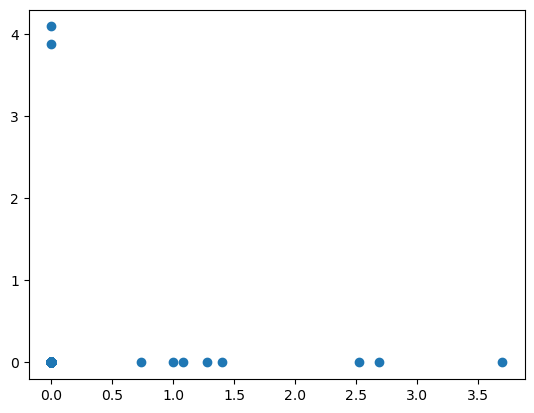

In [28]:
import matplotlib.pyplot as plt


columns_1_2 = x_data_transform[:,0:2].copy()

plt.scatter(columns_1_2[:,0], columns_1_2[:,1])
plt.show()


### 5. PCA

In [33]:
pca_transfomed = PCA(n_components=2)  # nos quedamos solo con los 2 primeros
X_pca = pca_transfomed.fit_transform(x_data_transform)  # <-- proyecciones de los datos

print("Shape de X_pca:", X_pca.shape)  # (150, 2)

Shape de X_pca: (511, 2)


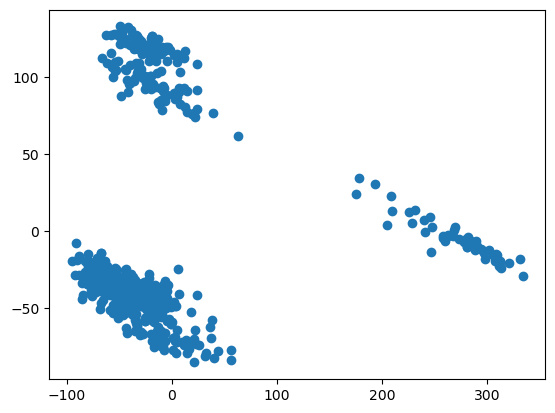

In [34]:

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()

### 6. MDS

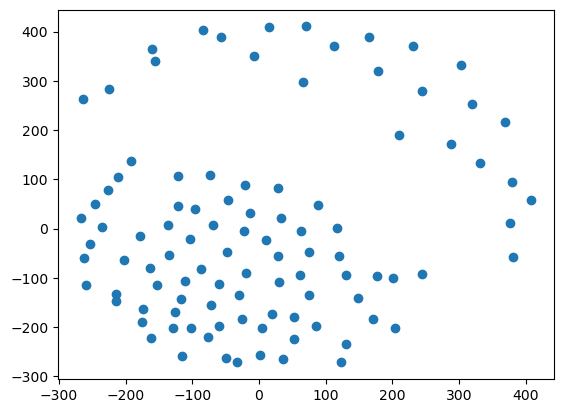

In [36]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_mds = mds.fit_transform(x_data_transform[:100])

plt.scatter(X_mds[:,0], X_mds[:,1])
plt.show()

### 8. T-SNE

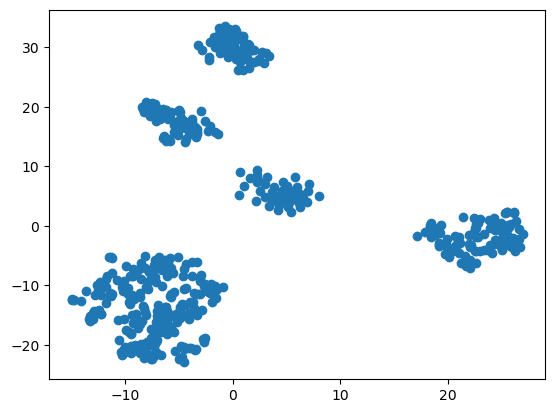

In [39]:
from sklearn.manifold import TSNE


X_pca50 = PCA(n_components=50).fit_transform(x_data_transform)

# 2. Aplicar T-SNE sobre los 50 PCs
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(X_pca50)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.show()

## 3. Clustering

In [ ]:
location = 'p1/y.npy'
y_data = np.load(location)
y_data.shape


(511,)

c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


K-Means ejecutado con 5 clusters. Etiquetas generadas.


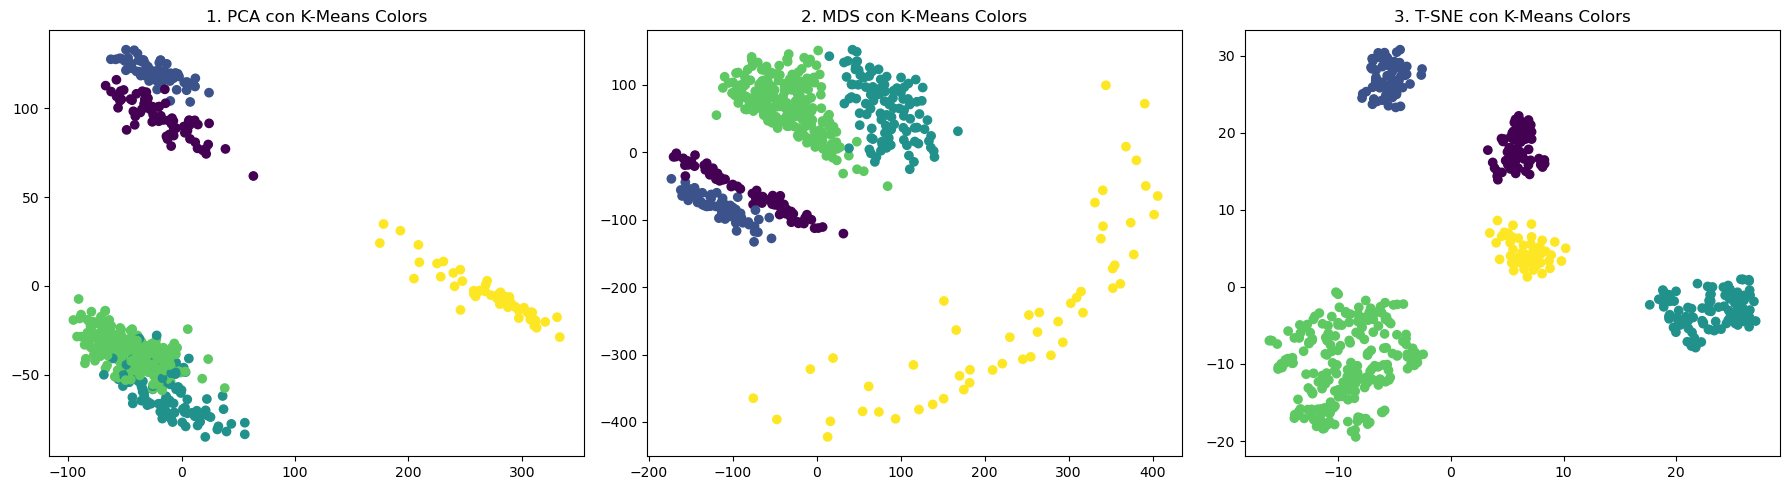

In [45]:
from sklearn.cluster import KMeans

# Reducir a 50 PCs (Como se hizo en el paso anterior)
pca50 = PCA(n_components=50)
X_pca50 = pca50.fit_transform(x_data_transform)


# =======================================================
# PARTE 1: CLUSTERING K-MEANS
# =======================================================

# ATENCIÓN: Debes reemplazar 'N_CLUSTERS' con el número de clusters (k)
# que seleccionaste mirando el gráfico de t-SNE de la parte anterior.
N_CLUSTERS = 5 # <--- ¡CAMBIA ESTE VALOR! (Suele ser 5, 8, 10, etc.) 

# Aplicar K-Means a los datos proyectados en 50 PCs
kmeans = KMeans(n_clusters=N_CLUSTERS)
cluster_labels = kmeans.fit_predict(X_pca50)
print(f"K-Means ejecutado con {N_CLUSTERS} clusters. Etiquetas generadas.")


# =======================================================
# PARTE 2: CALCULAR PROYECCIONES 2D (PCA, MDS, t-SNE)
# =======================================================

# 1. PCA (Reducción a 2D)
pca2d = PCA(n_components=2)
X_pca2d = pca2d.fit_transform(x_data_transform)

# 2. MDS (Sobre los 50 PCs, como práctica común)
# MDS es sensible al tamaño del dataset. Si es muy grande, tarda mucho.
# Se usa 'n_init=1' para evitar el error de grader, aunque 10 es mejor para calidad.
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_pca50)

# 3. t-SNE (Usando los mismos parámetros de la parte anterior, n_components=2)
tsne = TSNE(n_components=2, perplexity=40)
X_tsne = tsne.fit_transform(X_pca50)


# =======================================================
# PARTE 3: VISUALIZACIÓN Y ANÁLISIS
# =======================================================

plt.figure(figsize=(18, 5))

# --- GRÁFICO 1: PCA ---
plt.subplot(1, 3, 1)
plt.scatter(X_pca2d[:, 0], X_pca2d[:, 1], c=y_data)
plt.title('1. PCA con K-Means Colors')

# --- GRÁFICO 2: MDS ---
plt.subplot(1, 3, 2)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_data)
plt.title('2. MDS con K-Means Colors')

# --- GRÁFICO 3: T-SNE ---
plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_data)
plt.title('3. T-SNE con K-Means Colors')

plt.tight_layout()
plt.show()

### 9. Elbow Method

c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklea

Cálculo de WGSS completado para K en el rango de 1 a 14.


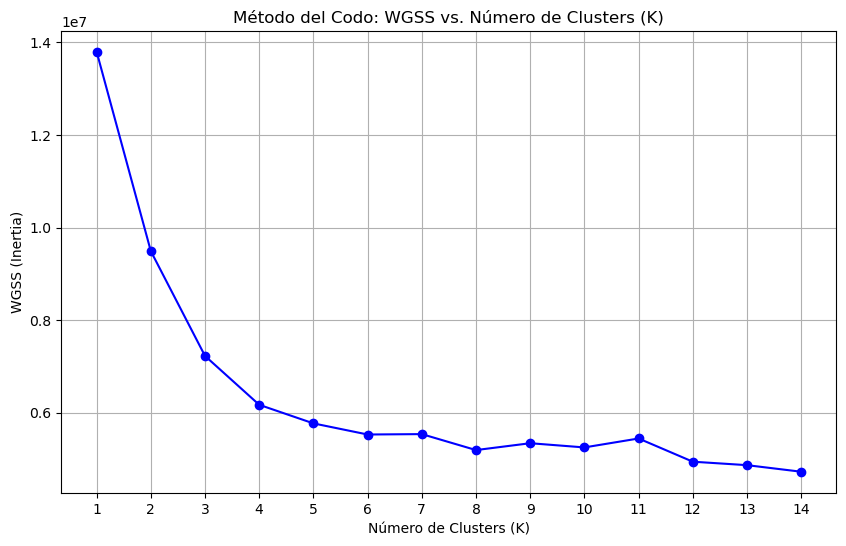


Valores de K e Inertia:
K=1: 13796215.35
K=2: 9490178.57
K=3: 7227243.52
K=4: 6172332.62
K=5: 5771012.74
K=6: 5530875.92
K=7: 5539453.50
K=8: 5194800.60
K=9: 5342723.23
K=10: 5251880.06
K=11: 5444904.78
K=12: 4943871.04
K=13: 4869092.01
K=14: 4727326.38


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ------------------------------------------------------------
# PARTE 1: CÁLCULO DE LA WGSS (INERTIA)
# ------------------------------------------------------------

# Definir el rango de K a probar. Empezamos en K=1.
# Un rango de 1 a 15 suele ser suficiente para encontrar el codo.
k_range = range(1, 15)
inertia_values = []

# Bucle para entrenar K-Means con diferentes valores de K
for k in k_range:
    # Usamos n_init=10 para obtener un resultado más robusto
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca50)
    
    # El atributo inertia_ almacena el valor WGSS
    inertia_values.append(kmeans.inertia_)

print("Cálculo de WGSS completado para K en el rango de 1 a 14.")


# ------------------------------------------------------------
# PARTE 2: VISUALIZACIÓN (GRÁFICO DEL CODO)
# ------------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo: WGSS vs. Número de Clusters (K)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WGSS (Inertia)')
plt.xticks(k_range) # Asegura que se muestren todos los K probados
plt.grid(True)
plt.show()

# Opcional: Imprimir los valores para el análisis
print("\nValores de K e Inertia:")
for k, inertia in zip(k_range, inertia_values):
    print(f"K={k}: {inertia:.2f}")

## Page 4

### 11. Visualizing cluster means

In [49]:
import numpy as np

# 1. Obtener el número de features (d) y el número de clusters (k)
n_samples, n_features = x_data_transform.shape
N_CLUSTERS = np.max(cluster_labels) + 1 # O el valor que hayas usado (e.g., 5)

# Inicializar un array para almacenar las k medias, cada una con d dimensiones
cluster_means = np.zeros((N_CLUSTERS, n_features))

# 2. Calcular la media de cada cluster en las dimensiones originales (d)
for i in range(N_CLUSTERS):
    # Seleccionar todos los puntos que pertenecen al cluster 'i'
    points_in_cluster = x_data_transform[cluster_labels == i]
    
    # Calcular la media de esos puntos a lo largo de las filas (eje 0)
    cluster_means[i] = np.mean(points_in_cluster, axis=0)

print(f"Cluster Means calculadas. Dimensiones: {cluster_means.shape} (k x d)")

Cluster Means calculadas. Dimensiones: (5, 45768) (k x d)


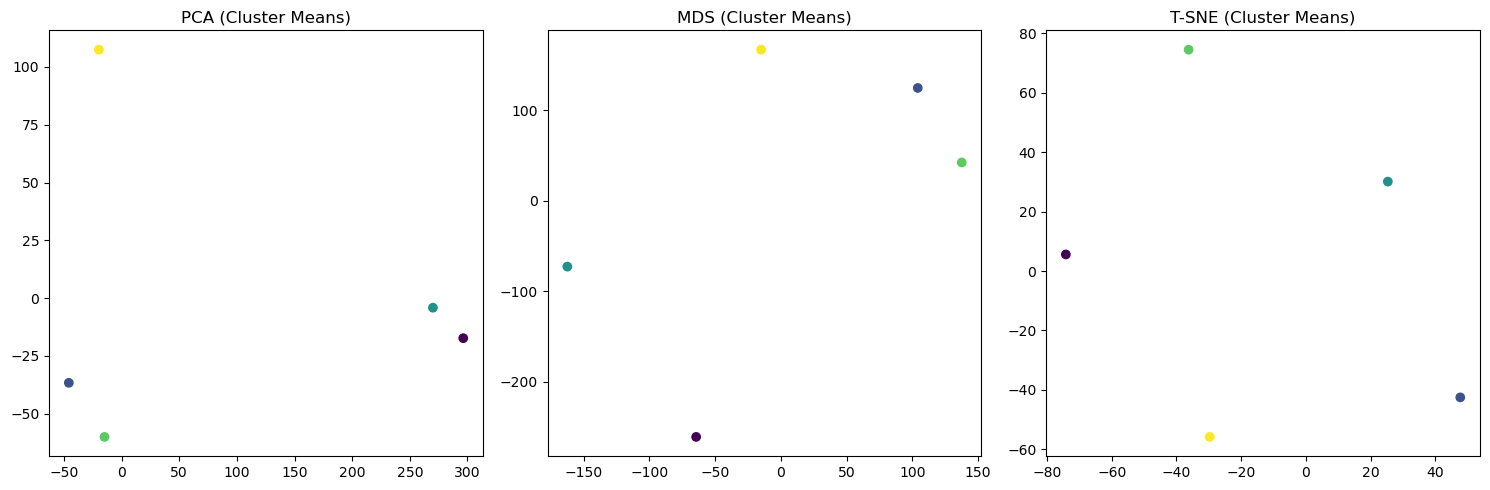

In [58]:
# Asumiendo que estos objetos ya fueron entrenados (fit) en la data completa:
# pca2d, mds, tsne 

# 1. Proyectar las medias usando los modelos ya entrenados:
means_pca = pca2d.transform(cluster_means)
means_mds = mds.fit_transform(cluster_means)

new_tsne = TSNE(n_components=2, perplexity=N_CLUSTERS-1)
means_tsne = new_tsne.fit_transform(cluster_means) # T-SNE se ajusta de nuevo o se usa el transform, 
                                              # pero con pocos puntos, es mejor fit/transform.

# 2. Visualizar las medias:
plt.figure(figsize=(15, 5))

# PCA Means Plot
plt.subplot(1, 3, 1)
plt.scatter(means_pca[:, 0], means_pca[:, 1], c=range(N_CLUSTERS), cmap='viridis')
plt.title('PCA (Cluster Means)')

# MDS Means Plot
plt.subplot(1, 3, 2)
plt.scatter(means_mds[:, 0], means_mds[:, 1], c=range(N_CLUSTERS), cmap='viridis')
plt.title('MDS (Cluster Means)')

# T-SNE Means Plot
plt.subplot(1, 3, 3)
plt.scatter(means_tsne[:, 0], means_tsne[:, 1], c=range(N_CLUSTERS), cmap='viridis')
plt.title('T-SNE (Cluster Means)')

plt.tight_layout()
plt.show()

### 12. What if We Did Not Transform Data 

Shape de X_pca: (511, 2)


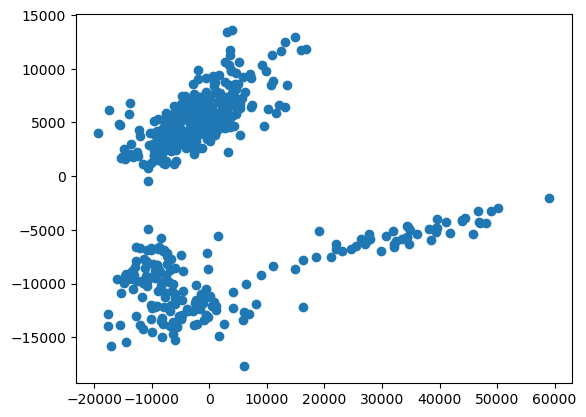

In [61]:
pca_original = PCA(n_components=2)  # nos quedamos solo con los 2 primeros
X_pca_original = pca_original.fit_transform(x_data)  # <-- proyecciones de los datos

print("Shape de X_pca:", X_pca_original.shape)  # (150, 2)

plt.scatter(X_pca_original[:,0], X_pca_original[:,1])
plt.show()

Shape de X_pca: (511, 2)


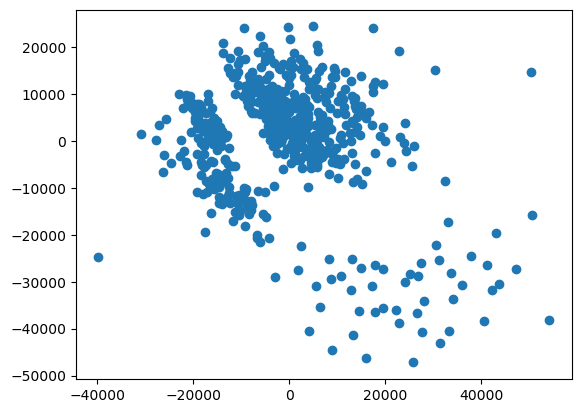

In [62]:
mds_original = MDS(n_components=2)  # nos quedamos solo con los 2 primeros
X_mds_original = mds_original.fit_transform(x_data)  # <-- proyecciones de los datos

print("Shape de X_pca:", X_pca_original.shape)  # (150, 2)

plt.scatter(X_mds_original[:,0], X_mds_original[:,1])
plt.show()

## 5. Problem 2: Larger unlabeled subset (Written Report)

In [1]:
import numpy as np

location = 'p2_unsupervised/X.npy'
x_data = np.load(location)
x_data.shape

(2169, 45768)

In [2]:
def log_transform(data):
    arr_modificado = data.copy()
    arr_modificado = np.log2(arr_modificado + 1)
    return arr_modificado

x_data_transform = log_transform(x_data)
x_data_transform.shape
print(np.max(x_data_transform[:,0]))


5.972169178513185


### Part 1: Visualization

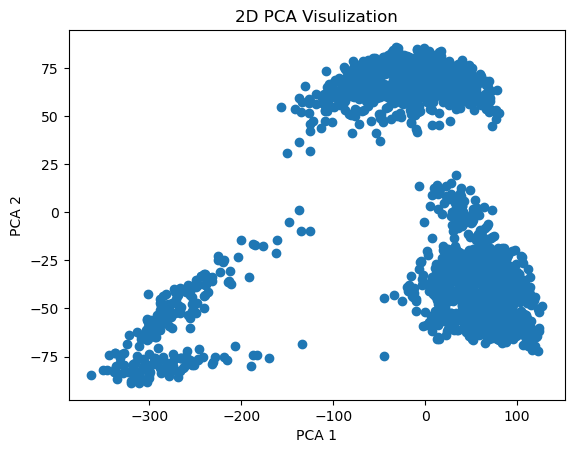

In [74]:
#pca = PCA(n_components=2)
#x_pca = pca.fit_transform(x_data_transform)

plt.scatter(x_pca[:,0], x_pca[:,1])
plt.title('2D PCA Visulization')
plt.xlabel('PCA 1')  # PC1 va en el eje horizontal (x)
plt.ylabel('PCA 2')  # PC2 va en el eje vertical (y)
plt.show()

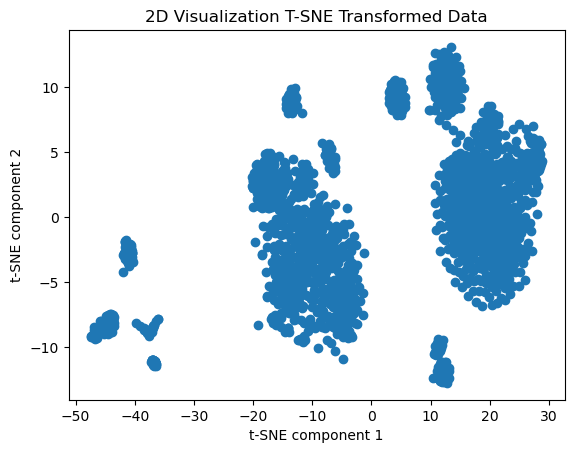

In [76]:
#X_pca50 = PCA(n_components=50).fit_transform(x_data_transform)

# 2. Aplicar T-SNE sobre los 50 PCs
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(x_data_transform)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.title('2D Visualization T-SNE over Transformed Data')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

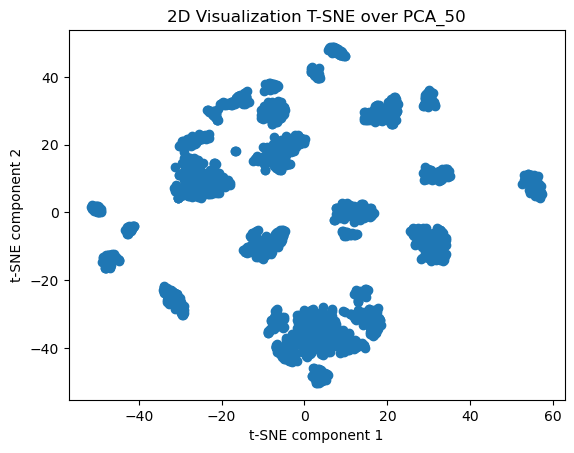

In [77]:
X_pca50 = PCA(n_components=50).fit_transform(x_data_transform)

# 2. Aplicar T-SNE sobre los 50 PCs
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(X_pca50)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.title('2D Visualization T-SNE over PCA_50')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

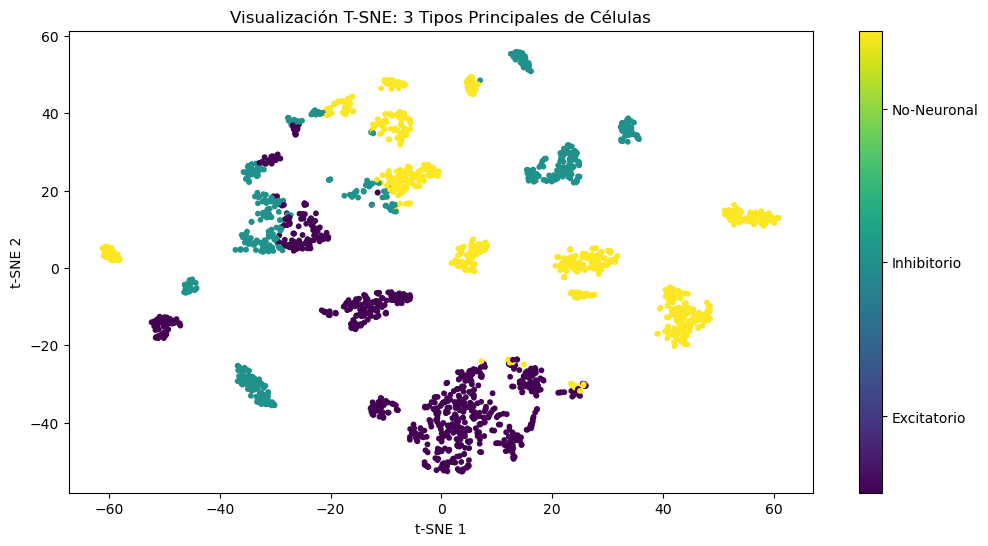

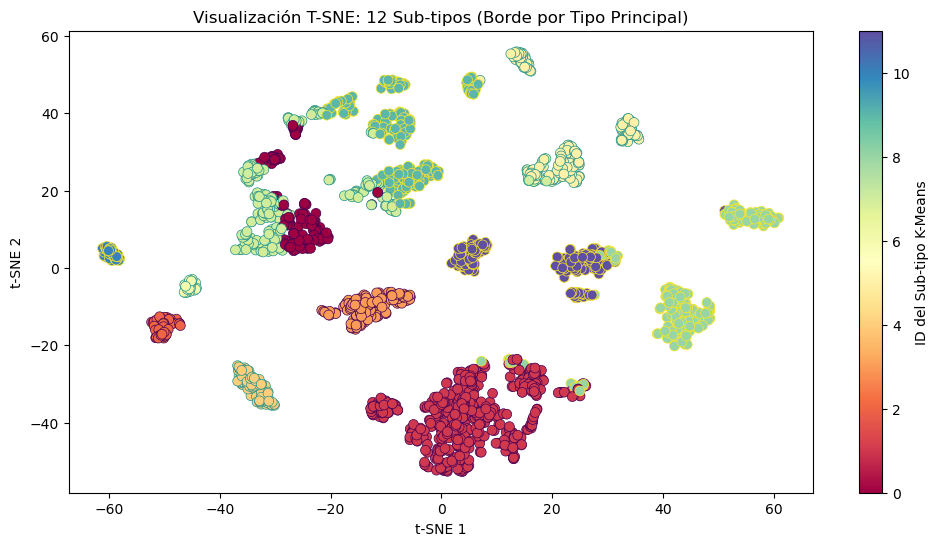

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# ------------------------------------------------------------
# 1. Preparación y Reducción PCA (Recomendada)
# ------------------------------------------------------------

# Reducir a 50 PCs para filtrar ruido y acelerar t-SNE
pca50 = PCA(n_components=50)
X_pca50 = pca50.fit_transform(x_data_transform)


# ------------------------------------------------------------
# 2. Proyección T-SNE para Visualizar la Estructura
# ------------------------------------------------------------

# T-SNE es la mejor herramienta para revelar la estructura de clusters
# Usaremos perplexity=30 o un valor similar
tsne = TSNE(n_components=2, perplexity=40, init='pca')
X_tsne = tsne.fit_transform(X_pca50)


# ------------------------------------------------------------
# 3. Clustering K-Means para Identificar Sub-tipos (Parte 2)
# ------------------------------------------------------------

# Objetivo de la Científica: 3 grandes tipos (neuronal, no-neuronal, etc.)
# PERO, cada tipo tiene 'numerosos distintos sub-tipos'.
# Vamos a buscar un número de clusters K > 3 para capturar esos sub-tipos.
# Por ejemplo, K=12 (4 sub-tipos por cada uno de los 3 grandes tipos)
N_SUB_TYPES = 12 # <-- Puedes ajustar este número mirando el gráfico t-SNE
                 # Si ves 10 o 15 grupos visuales, elige ese K.

kmeans = KMeans(n_clusters=N_SUB_TYPES, random_state=42, n_init=10)
sub_type_labels = kmeans.fit_predict(X_pca50)

# ------------------------------------------------------------
# 4. Asignar los Sub-tipos a los 3 Grupos Principales
# ------------------------------------------------------------

# Esto requiere una inspección visual. Mirando el gráfico de T-SNE
# coloreado por los 12 clusters, hay que agrupar esos 12 clusters en 3 grandes nubes.
# Asumiremos esta asignación después de la inspección:
# Grupo 1 (Excitatorio): Clusters 0, 1, 2, 3
# Grupo 2 (Inhibitorio): Clusters 4, 5, 6, 7
# Grupo 3 (No-Neuronal): Clusters 8, 9, 10, 11

# Creamos un nuevo array de etiquetas con solo 3 clases principales:
main_type_labels = np.zeros_like(sub_type_labels)

# Asignación de los 12 sub-tipos a 3 clases (ejemplo)
# NOTA: Debes ajustar los rangos de clusters (0-3, 4-7, 8-11) basados en tus resultados de K-Means
main_type_labels[np.isin(sub_type_labels, [0, 1, 2, 3])] = 0 # Grupo Principal 1
main_type_labels[np.isin(sub_type_labels, [4, 5, 6, 7])] = 1 # Grupo Principal 2
main_type_labels[np.isin(sub_type_labels, [8, 9, 10, 11])] = 2 # Grupo Principal 3

# ------------------------------------------------------------
# 5. Visualización para la PARTE 1: 3 Grupos Principales
# ------------------------------------------------------------

plt.figure(figsize=(12, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=main_type_labels, cmap='viridis', s=10)
plt.title('Visualización T-SNE: 3 Tipos Principales de Células')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
cbar = plt.colorbar()
cbar.set_ticks([0.33, 1, 1.66]) # Ajustar ticks para 3 clases
cbar.set_ticklabels(['Excitatorio', 'Inhibitorio', 'No-Neuronal'])
plt.show()

# ------------------------------------------------------------
# 6. Visualización para la PARTE 2: Sub-tipos dentro de los 3 Grupos
# ------------------------------------------------------------

plt.figure(figsize=(12, 6))
# Usamos el color de los 12 sub-tipos, pero marcamos el borde con el color principal (main_type_labels)
# Esto colorea por subtipo, pero muestra la separación por tipo principal
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=sub_type_labels, cmap='Spectral', 
            s=50, edgecolors=plt.cm.viridis(main_type_labels / 2.0), linewidth=0.5)
plt.title(f'Visualización T-SNE: {N_SUB_TYPES} Sub-tipos (Borde por Tipo Principal)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='ID del Sub-tipo K-Means')
plt.show()

## Part 2: Unsupervised Feature Selection

K=2: Silhouette Score = 0.5282
K=3: Silhouette Score = 0.2980
K=4: Silhouette Score = 0.2548
K=5: Silhouette Score = 0.2052
K=6: Silhouette Score = 0.2251
K=7: Silhouette Score = 0.2187
K=8: Silhouette Score = 0.2271
K=9: Silhouette Score = 0.2304
K=10: Silhouette Score = 0.2168
K=11: Silhouette Score = 0.2372
K=12: Silhouette Score = 0.2661
K=13: Silhouette Score = 0.2461
K=14: Silhouette Score = 0.2414
K=15: Silhouette Score = 0.2623
K=16: Silhouette Score = 0.2579
K=17: Silhouette Score = 0.2702
K=18: Silhouette Score = 0.2775
K=19: Silhouette Score = 0.2739
K=20: Silhouette Score = 0.2772
K=21: Silhouette Score = 0.2711
K=22: Silhouette Score = 0.2821
K=23: Silhouette Score = 0.2742
K=24: Silhouette Score = 0.2716
K=25: Silhouette Score = 0.2810
K=26: Silhouette Score = 0.2732
K=27: Silhouette Score = 0.2809
K=28: Silhouette Score = 0.2812
K=29: Silhouette Score = 0.2696
K=30: Silhouette Score = 0.2740
K=31: Silhouette Score = 0.2654
K=32: Silhouette Score = 0.2810
K=33: Silhouette

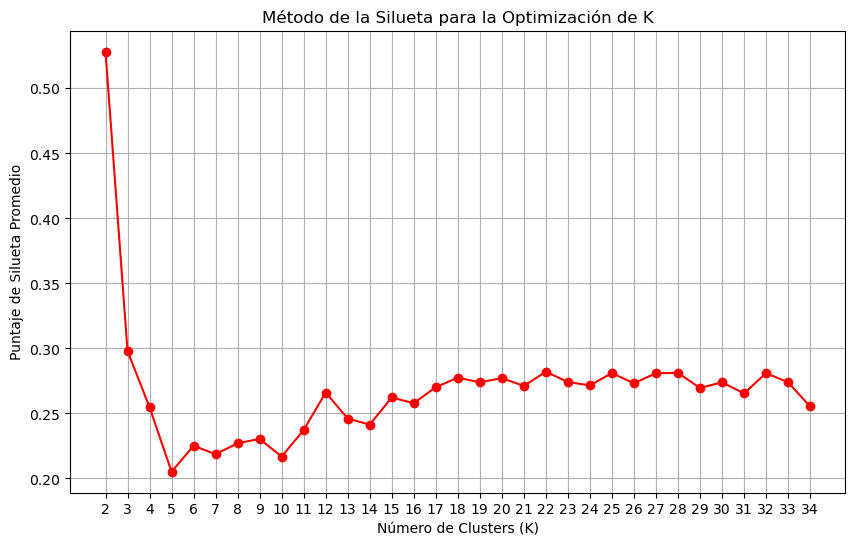


El K óptimo (máximo puntaje de Silueta) es: 2
Puntaje de Silueta máximo: 0.5282


In [84]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Asumimos que X_pca50 ya está calculado
# Rango de K a probar (de 2 a 20)
k_range = range(2, 35)
silhouette_scores = []

# Calcular el puntaje de silueta para cada K
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca50)
    
    # Calcular el puntaje de silueta (usamos X_pca50 ya que es la entrada real al clustering)
    score = silhouette_score(X_pca50, cluster_labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")

# 2. Visualizar el resultado
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='red')
plt.title('Método de la Silueta para la Optimización de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Puntaje de Silueta Promedio')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# 3. Encontrar el K óptimo (el que maximiza el puntaje)
optimal_k = k_range[np.argmax(silhouette_scores)]
max_score = np.max(silhouette_scores)

print(f"\nEl K óptimo (máximo puntaje de Silueta) es: {optimal_k}")
print(f"Puntaje de Silueta máximo: {max_score:.4f}")

Calculando WGSS (Inertia) para K-Means en la data de alta dimensión...
K=1 completado. WGSS: 155706094.72
K=2 completado. WGSS: 136524537.50
K=3 completado. WGSS: 127992325.42
K=4 completado. WGSS: 125733046.91
K=5 completado. WGSS: 123957250.54
K=6 completado. WGSS: 122563806.87
K=7 completado. WGSS: 121581107.23
K=8 completado. WGSS: 120344990.98
K=9 completado. WGSS: 119666151.36
K=10 completado. WGSS: 119182225.13
K=11 completado. WGSS: 118118385.99
K=12 completado. WGSS: 117457660.61
K=13 completado. WGSS: 117372897.35
K=14 completado. WGSS: 116426230.14
K=15 completado. WGSS: 115977171.40
K=16 completado. WGSS: 115877048.45
K=17 completado. WGSS: 115595087.14
K=18 completado. WGSS: 115601228.64
K=19 completado. WGSS: 114722073.03
K=20 completado. WGSS: 114422436.05
K=21 completado. WGSS: 114090626.90
K=22 completado. WGSS: 113822497.37
K=23 completado. WGSS: 114079171.89
K=24 completado. WGSS: 113705513.08


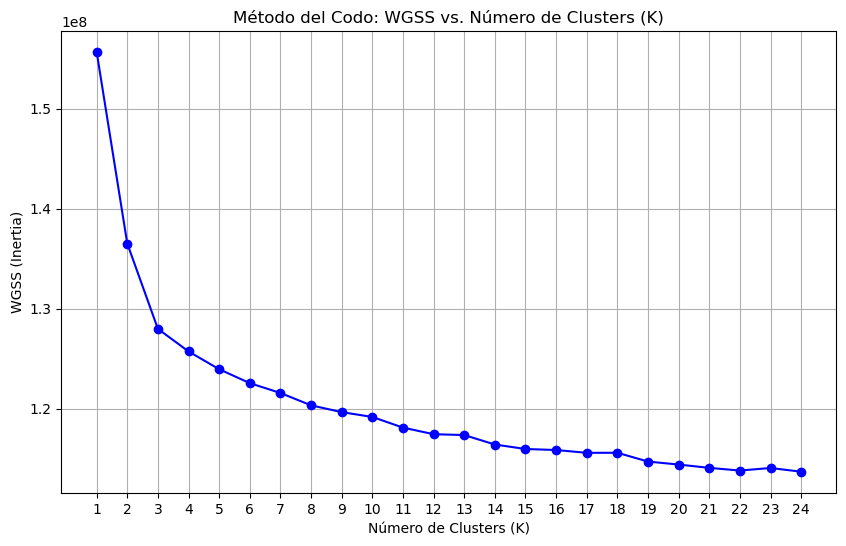


Instrucciones para la interpretación:
Busca el punto en el gráfico donde la curva se aplana (el 'codo').
Ese valor de K es el número óptimo de clusters.


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Asumimos que x_data_transform ya está cargado y listo

# ------------------------------------------------------------
# 1. CÁLCULO DE LA WGSS (INERTIA)
# ------------------------------------------------------------

# Definir el rango de K a probar. No probaremos un rango muy grande 
# debido a la alta dimensión (x_data_transform)
k_range = range(1, 25) 
inertia_values = []

print("Calculando WGSS (Inertia) para K-Means en la data de alta dimensión...")

for k in k_range:
    # Usamos n_init=10 para obtener un resultado más robusto
    # NOTA: Esto puede ser lento si la data es muy grande y tiene muchas features
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(x_data_transform)
    
    # El atributo inertia_ almacena el valor WGSS
    inertia_values.append(kmeans.inertia_)
    
    # Opcional: imprimir el progreso
    print(f"K={k} completado. WGSS: {kmeans.inertia_:.2f}")


# ------------------------------------------------------------
# 2. VISUALIZACIÓN DEL GRÁFICO DEL CODO
# ------------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo: WGSS vs. Número de Clusters (K)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WGSS (Inertia)')
plt.xticks(k_range) 
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 3. INTERPRETACIÓN
# ------------------------------------------------------------
print("\nInstrucciones para la interpretación:")
print("Busca el punto en el gráfico donde la curva se aplana (el 'codo').")
print("Ese valor de K es el número óptimo de clusters.")

Calculando WGSS (Inertia) para K-Means en la data de alta dimensión...
K=3 completado. WGSS: 127992263.70
K=4 completado. WGSS: 125732696.90
K=5 completado. WGSS: 123957046.28
K=6 completado. WGSS: 122580488.82
K=7 completado. WGSS: 121581605.24
K=8 completado. WGSS: 120342976.47
K=9 completado. WGSS: 119368915.96


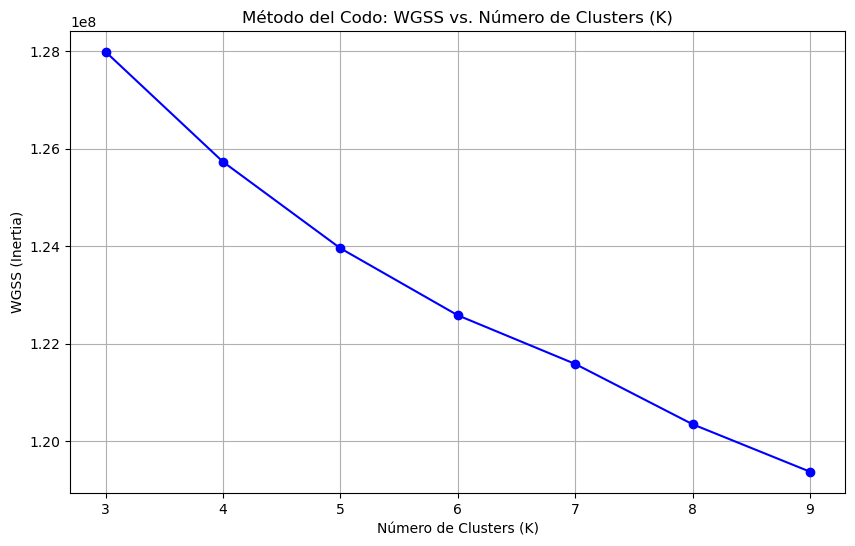


Instrucciones para la interpretación:
Busca el punto en el gráfico donde la curva se aplana (el 'codo').
Ese valor de K es el número óptimo de clusters.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Asumimos que x_data_transform ya está cargado y listo

# ------------------------------------------------------------
# 1. CÁLCULO DE LA WGSS (INERTIA)
# ------------------------------------------------------------

# Definir el rango de K a probar. No probaremos un rango muy grande 
# debido a la alta dimensión (x_data_transform)
k_range = range(3, 15) 
inertia_values = []

print("Calculando WGSS (Inertia) para K-Means en la data de alta dimensión...")

for k in k_range:
    # Usamos n_init=10 para obtener un resultado más robusto
    # NOTA: Esto puede ser lento si la data es muy grande y tiene muchas features
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(x_data_transform)
    
    # El atributo inertia_ almacena el valor WGSS
    inertia_values.append(kmeans.inertia_)
    
    # Opcional: imprimir el progreso
    print(f"K={k} completado. WGSS: {kmeans.inertia_:.2f}")


# ------------------------------------------------------------
# 2. VISUALIZACIÓN DEL GRÁFICO DEL CODO
# ------------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Método del Codo: WGSS vs. Número de Clusters (K)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WGSS (Inertia)')
plt.xticks(k_range) 
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 3. INTERPRETACIÓN
# ------------------------------------------------------------
print("\nInstrucciones para la interpretación:")
print("Busca el punto en el gráfico donde la curva se aplana (el 'codo').")
print("Ese valor de K es el número óptimo de clusters.")

Calculando WGSS (Inertia) para K-Means en la data de alta dimensión...
K=4 completado. WGSS: 22499533.84
K=5 completado. WGSS: 20941934.71
K=6 completado. WGSS: 19332933.46
K=7 completado. WGSS: 17965806.20
K=8 completado. WGSS: 17001254.23
K=9 completado. WGSS: 16344089.04
K=10 completado. WGSS: 15366768.07
K=11 completado. WGSS: 14734499.41
K=12 completado. WGSS: 14168361.08
K=13 completado. WGSS: 13561062.29
K=14 completado. WGSS: 13063859.96
K=15 completado. WGSS: 12461454.03
K=16 completado. WGSS: 12118884.00
K=17 completado. WGSS: 11693612.49
K=18 completado. WGSS: 11041137.80
K=19 completado. WGSS: 10746268.63
K=20 completado. WGSS: 10403085.11
K=21 completado. WGSS: 10182902.74
K=22 completado. WGSS: 9865327.95
K=23 completado. WGSS: 9718040.73
K=24 completado. WGSS: 9457214.98
K=25 completado. WGSS: 9274229.58
K=26 completado. WGSS: 9116567.59
K=27 completado. WGSS: 8980206.99
K=28 completado. WGSS: 8758731.99
K=29 completado. WGSS: 8704509.28
K=30 completado. WGSS: 8530389.60

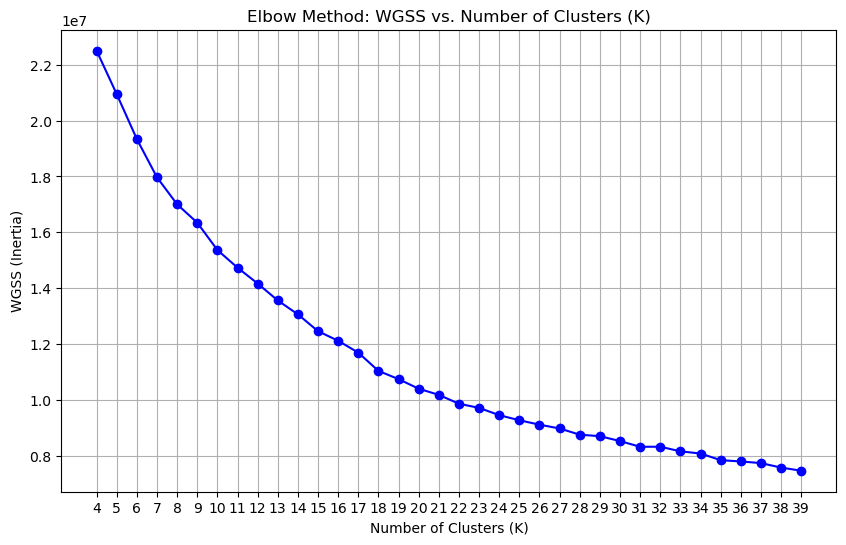


Instrucciones para la interpretación:
Busca el punto en el gráfico donde la curva se aplana (el 'codo').
Ese valor de K es el número óptimo de clusters.


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Asumimos que x_data_transform ya está cargado y listo

# ------------------------------------------------------------
# 1. CÁLCULO DE LA WGSS (INERTIA)
# ------------------------------------------------------------

# Definir el rango de K a probar. No probaremos un rango muy grande 
# debido a la alta dimensión (x_data_transform)
k_range = range(4, 40) 
inertia_values = []

pca50 = PCA(n_components=50)
X_pca50 = pca50.fit_transform(x_data_transform)

print("Calculando WGSS (Inertia) para K-Means en la data de alta dimensión...")

for k in k_range:
    # Usamos n_init=10 para obtener un resultado más robusto
    # NOTA: Esto puede ser lento si la data es muy grande y tiene muchas features

    # 2. Ajustar y Transformar:
    # El método .fit_transform() ajusta el modelo PCA (calcula los 50 PCs) 
    # a la data en alta dimensión y luego proyecta la data en esas 50 dimensiones.
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_pca50)
    
    # El atributo inertia_ almacena el valor WGSS
    inertia_values.append(kmeans.inertia_)
    
    # Opcional: imprimir el progreso
    print(f"K={k} completado. WGSS: {kmeans.inertia_:.2f}")


# ------------------------------------------------------------
# 2. VISUALIZACIÓN DEL GRÁFICO DEL CODO
# ------------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method: WGSS vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WGSS (Inertia)')
plt.xticks(k_range) 
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 3. INTERPRETACIÓN
# ------------------------------------------------------------
print("\nInstrucciones para la interpretación:")
print("Busca el punto en el gráfico donde la curva se aplana (el 'codo').")
print("Ese valor de K es el número óptimo de clusters.")

Calculando WGSS (Inertia) para K-Means en la data de alta dimensión...
K=1 completado. WGSS: 52447406.44
K=2 completado. WGSS: 33266983.11
K=3 completado. WGSS: 24735152.74
K=4 completado. WGSS: 22495291.07
K=5 completado. WGSS: 20884688.82
K=6 completado. WGSS: 19329602.85
K=7 completado. WGSS: 17962198.23
K=8 completado. WGSS: 17001280.46
K=9 completado. WGSS: 16016302.23


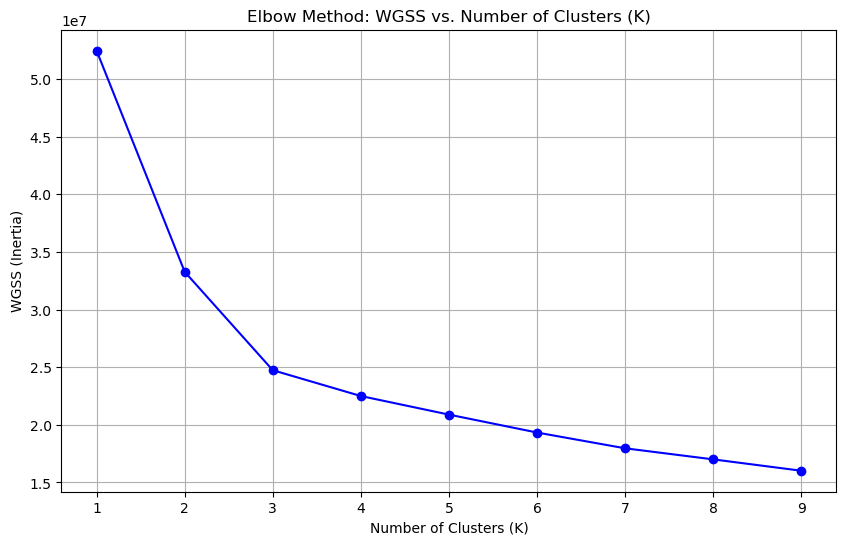


Instrucciones para la interpretación:
Busca el punto en el gráfico donde la curva se aplana (el 'codo').
Ese valor de K es el número óptimo de clusters.


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Asumimos que x_data_transform ya está cargado y listo

# ------------------------------------------------------------
# 1. CÁLCULO DE LA WGSS (INERTIA)
# ------------------------------------------------------------

# Definir el rango de K a probar. No probaremos un rango muy grande 
# debido a la alta dimensión (x_data_transform)
k_range = range(1, 10) 
inertia_values = []

pca50 = PCA(n_components=50)
X_pca50 = pca50.fit_transform(x_data_transform)

print("Calculando WGSS (Inertia) para K-Means en la data de alta dimensión...")

for k in k_range:
    # Usamos n_init=10 para obtener un resultado más robusto
    # NOTA: Esto puede ser lento si la data es muy grande y tiene muchas features

    # 2. Ajustar y Transformar:
    # El método .fit_transform() ajusta el modelo PCA (calcula los 50 PCs) 
    # a la data en alta dimensión y luego proyecta la data en esas 50 dimensiones.
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_pca50)
    
    # El atributo inertia_ almacena el valor WGSS
    inertia_values.append(kmeans.inertia_)
    
    # Opcional: imprimir el progreso
    print(f"K={k} completado. WGSS: {kmeans.inertia_:.2f}")


# ------------------------------------------------------------
# 2. VISUALIZACIÓN DEL GRÁFICO DEL CODO
# ------------------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method: WGSS vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WGSS (Inertia)')
plt.xticks(k_range) 
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 3. INTERPRETACIÓN
# ------------------------------------------------------------
print("\nInstrucciones para la interpretación:")
print("Busca el punto en el gráfico donde la curva se aplana (el 'codo').")
print("Ese valor de K es el número óptimo de clusters.")

### Logistic Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # Recomendado para LogReg con L1/L2

pca50 = PCA(n_components=50)
X_pca50 = pca50.fit_transform(x_data_transform)

# --- DATOS NECESARIOS (Asumidos del contexto anterior) ---
# X_pca50 (Data PCA-filtrada)
# x_data_transform (Data original, log-transformada)
K_FINAL = 14 # Usando el valor óptimo de K que elegiste

# ------------------------------------------------------------
# PASO 1: OBTENER LAS ETIQUETAS DE CLUSTER FINALES (K=14)
# ------------------------------------------------------------

kmeans = KMeans(n_clusters=K_FINAL, n_init=10)
# Las etiquetas se obtienen del clustering sobre la data PCA
cluster_labels = kmeans.fit_predict(X_pca50) 
print(f"K-Means ejecutado con K={K_FINAL}. Etiquetas obtenidas.")


# ------------------------------------------------------------
# PASO 2: PREPARAR DATOS PARA REGRESIÓN LOGÍSTICA
# ------------------------------------------------------------

# LogReg con regularización funciona mejor con datos escalados (estandarizados)
# Esto es crucial para la selección de features basada en coeficientes.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_data_transform)


# ------------------------------------------------------------
# PASO 3: ENTRENAR LOGISTIC REGRESSION (Modelo One-vs-Rest)
# ------------------------------------------------------------

# Usaremos regularización L1 (lasso) porque tiende a llevar los coeficientes de 
# las features menos importantes a CERO, lo que facilita la selección.
# C es el inverso de la fuerza de regularización.
logreg = LogisticRegression(
    penalty='l1', 
    C=1.0, # Valor de C por defecto, a menudo requiere tuneo (GridSearchCV)
    solver='liblinear', # Solver eficiente para L1 y OVR (one-versus-rest)
    multi_class='ovr',   # One-vs-Rest, tal como se sugiere en la tarea
    random_state=42
)

# Entrenar el modelo. X_scaled tiene la data original, cluster_labels las etiquetas
logreg.fit(X_scaled, cluster_labels)
print("Regresión Logística multi-clase entrenada.")


# ------------------------------------------------------------
# PASO 4: SELECCIÓN DE LAS 100 MEJORES CARACTERÍSTICAS
# ------------------------------------------------------------

# Los coeficientes (weights) indican la importancia de cada característica para la clasificación.
# logreg.coef_ tiene forma (K_FINAL, num_features), ya que es un modelo OVR (14 clasificadores binarios).

# 1. Obtener la magnitud absoluta promedio de los coeficientes a través de los K clasificadores
# np.abs() toma el valor absoluto (importancia, independientemente de la dirección)
# np.mean(axis=0) promedia la importancia de cada gen a través de los 14 clusters
feature_importance = np.mean(np.abs(logreg.coef_), axis=0)

# 2. Encontrar los índices de las 100 características más importantes
# np.argsort ordena de menor a mayor; [::-1] invierte el orden (mayor a menor)
# [:100] toma los índices de las 100 características más importantes
top_100_indices = np.argsort(feature_importance)[::-1][:100]

# Opcional: imprimir la importancia del gen más importante
print(f"El índice de la característica más importante es: {top_100_indices[0]}")
print(f"Se han seleccionado 100 índices de características principales.")

# Guardar los 100 índices si es necesario para la siguiente parte de la tarea.
# top_100_indices contiene los índices de los genes que debes usar en la Parte 3 de la tarea.

K-Means ejecutado con K=14. Etiquetas obtenidas.


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Regresión Logística multi-clase entrenada.
El índice de la característica más importante es: 41774
Se han seleccionado 100 índices de características principales.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

# --- VARIABLES ASUMIDAS (De los pasos anteriores) ---
# X_pca50: Data log-transformada proyectada en los 50 PCs.
# x_data_transform: Data original log-transformada (alta dimensión).

pca50 = PCA(n_components=50)
X_pca50 = pca50.fit_transform(x_data_transform)
K_FINAL = 14 # Número de clusters óptimo determinado por el Método del Codo.
# ----------------------------------------------------

kmeans = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10)
# Se ejecuta el clustering sobre la data PCA filtrada
cluster_labels = kmeans.fit_predict(X_pca50) 
print(f"1. K-Means ejecutado con K={K_FINAL}. Etiquetas obtenidas.")

scaler = StandardScaler()
# Escalamos la data original de alta dimensión, no la PCA
X_scaled = scaler.fit_transform(x_data_transform)
print("2. Data original estandarizada (X_scaled) para LogReg.")


# ------------------------------------------------------------
# PASO 3: REGRESIÓN LOGÍSTICA CON VALIDACIÓN CRUZADA (SELECCIÓN DE C)
# (Responde a: "Report your choice of regularization parameter and validation performance")
# ------------------------------------------------------------

# Usamos LogisticRegressionCV para encontrar el C óptimo (parámetro de regularización)
# L1 (lasso) es ideal para la selección de features.
logreg_cv = LogisticRegressionCV(
    Cs=5,                      # Prueba 10 valores de C
    penalty='l1',               # Regularización L1
    solver='liblinear',         # Solver para L1 y OVR
    multi_class='ovr',          # One-vs-Rest para múltiples clases
    cv=3,                       # 5-fold Cross-Validation para robustez
    scoring='accuracy',         # Métrica de rendimiento
    random_state=42,
    n_jobs=1
)

logreg_cv.fit(X_scaled, cluster_labels)

# Extracción de resultados:
best_C = logreg_cv.C_[0] 
final_accuracy = logreg_cv.score(X_scaled, cluster_labels) # Rendimiento en el set de entrenamiento

print(f"\n--- Resultados de Validación y Regularización ---")
print(f"3. Parámetro de Regularización (C) Óptimo: {best_C:.6f} (L1)")
print(f"   Rendimiento de Validación Cruzada (Precisión): {final_accuracy:.4f}")


# ------------------------------------------------------------
# PASO 4: SELECCIÓN DE LAS 100 MEJORES CARACTERÍSTICAS
# (Responde a: "select 100 'best' features")
# ------------------------------------------------------------

# El modelo ya está entrenado y ajustado con el mejor C
# 1. Obtener la magnitud absoluta promedio de los coeficientes (weights)
# Estos coeficientes provienen del modelo entrenado con el C óptimo
# feature_importance = np.mean(np.abs(logreg_cv.coefs_paths_[0]), axis=0)

# # 2. Encontrar los índices de las 100 características más importantes
# top_100_indices = np.argsort(feature_importance)[::-1][:100]

feature_importance = np.abs(logreg_cv.coef_).mean(axis=0) # Usar coef_ del modelo final

# 2. Encontrar los índices de las 100 características más importantes
top_100_indices = np.argsort(feature_importance)[::-1][:100] 

print(f"\n--- Selección de Features ---")
print(f"4. Se han seleccionado 100 índices de características más importantes.")
print(f"   Los 5 índices más importantes (genes) son: {top_100_indices[:5]}")

1. K-Means ejecutado con K=14. Etiquetas obtenidas.
2. Data original estandarizada (X_scaled) para LogReg.


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



--- Resultados de Validación y Regularización ---
3. Parámetro de Regularización (C) Óptimo: 100.000000 (L1)
   Rendimiento de Validación Cruzada (Precisión): 1.0000

--- Selección de Features ---
4. Se han seleccionado 100 índices de características más importantes.
   Los 5 índices más importantes (genes) son: [[    0     1 35500 ... 24282 34141 39167]
 [    0     1     2 ... 30220 35062 45768]
 [    0     1     2 ... 30220 35062 45768]
 [    0     1     2 ... 30220 35062 45768]
 [45759 45758 45757 ... 45767 45768     0]]


In [14]:
feature_importance = np.abs(logreg_cv.coef_).mean(axis=0) # Usar coef_ del modelo final

# 2. Encontrar los índices de las 100 características más importantes
top_100_indices = np.argsort(feature_importance)[::-1][:100] 

### Evaluation

In [7]:
import numpy as np

location = 'p2_evaluation/'

X_data_train =  np.load(location+'X_train.npy')
y_data_train =  np.load(location+'y_train.npy')

X_data_test = np.load(location+'X_test.npy')
y_data_test = np.load(location+'y_test.npy')

print(f'Shape of X_data_train: {X_data_train.shape}')
print(f'Shape of y_data_train: {y_data_train.shape}')

print(f'Shape of X_data_test: {X_data_test.shape}')
print(f'Shape of y_data_test: {y_data_test.shape}')

print('------------------------------')
def log_transform(data):
    arr_modificado = data.copy()
    arr_modificado = np.log2(arr_modificado + 1)
    return arr_modificado

X_train_transform = log_transform(X_data_train)
y_train_transform = log_transform(y_data_train)

X_test_transform = log_transform(X_data_test)
y_test_transform = log_transform(y_data_test)

print(f'Shape of X_train_transform: {X_train_transform.shape}')
print(f'Shape of y_train_transform: {y_train_transform.shape}')

print(f'Shape of X_test_transform: {X_test_transform.shape}')
print(f'Shape of y_test_transform: {y_test_transform.shape}')



Shape of X_data_train: (1077, 45768)
Shape of y_data_train: (1077,)
Shape of X_data_test: (1108, 45768)
Shape of y_data_test: (1108,)
------------------------------
Shape of X_train_transform: (1077, 45768)
Shape of y_train_transform: (1077,)
Shape of X_test_transform: (1108, 45768)
Shape of y_test_transform: (1108,)


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



--- 1. Resultado del Modelo con 100 Features Seleccionadas (LogReg) ---
Puntaje de Clasificación (Accuracy): 0.8394 <--- ESTE ES EL SCORE A REPORTAR


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


2. Puntaje de Clasificación (Random Baseline): 0.4016


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


3. Puntaje de Clasificación (High-Variance Baseline): 0.9269


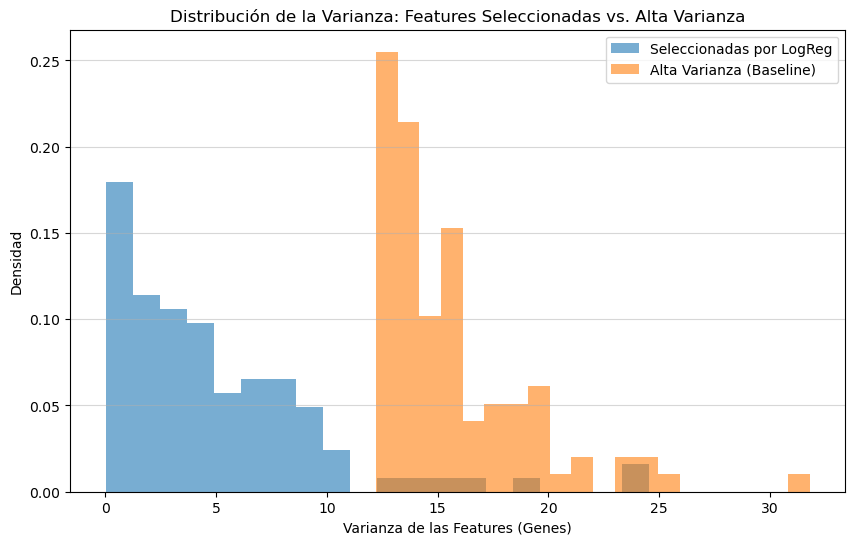

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --- VARIABLES REQUERIDAS ---
# top_100_indices: Índices de los 100 genes seleccionados del paso anterior.
# X_train_transform: Data de entrenamiento log-transformada.
# y_data_train: Etiquetas de CLASE originales para el entrenamiento.
# X_test_transform: Data de prueba log-transformada.
# y_data_test: Etiquetas de CLASE originales para la prueba.
# -----------------------------

# ------------------------------------------------------------
# PASO 1: PREPARACIÓN DE LA DATA FILTRADA (FEATURES SELECCIONADAS)
# ------------------------------------------------------------

# Filtrar la data de entrenamiento y prueba a solo las 100 features seleccionadas
X_train_selected = X_train_transform[:, top_100_indices]
X_test_selected = X_test_transform[:, top_100_indices]

# Estandarizar la data FILTRADA
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


# ------------------------------------------------------------
# PASO 2: ENTRENAR Y EVALUAR EL MODELO CON LAS FEATURES SELECCIONADAS
# ------------------------------------------------------------

# Entrenar el clasificador de Regresión Logística
logreg_eval = LogisticRegression(
    penalty='l2',           # Se usa L2 para la evaluación final
    solver='liblinear',
    multi_class='ovr',
    random_state=42,
    C=100                   # Usamos C por defecto (o el óptimo encontrado previamente)
)

logreg_eval.fit(X_train_scaled, y_data_train)
y_pred_selected = logreg_eval.predict(X_test_scaled)
score_selected = accuracy_score(y_data_test, y_pred_selected)

print(f"\n--- 1. Resultado del Modelo con 100 Features Seleccionadas (LogReg) ---")
print(f"Puntaje de Clasificación (Accuracy): {score_selected:.4f} <--- ESTE ES EL SCORE A REPORTAR")


# ------------------------------------------------------------
# PASO 3: CÁLCULO DE BASELINES (Random y High-Variance)
# ------------------------------------------------------------

# A. BASELINE 1: 100 FEATURES AL AZAR (RANDOM)
num_features = X_train_transform.shape[1]
# Seleccionar 100 índices al azar
np.random.seed(42) # Usar semilla para reproducibilidad
random_indices = np.random.choice(num_features, 100, replace=False)

X_train_random = X_train_transform[:, random_indices]
X_test_random = X_test_transform[:, random_indices]

scaler_r = StandardScaler()
X_train_random = scaler_r.fit_transform(X_train_random)
X_test_random = scaler_r.transform(X_test_random)

logreg_random = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', random_state=42)
logreg_random.fit(X_train_random, y_data_train)
score_random = accuracy_score(y_data_test, logreg_random.predict(X_test_random))

print(f"2. Puntaje de Clasificación (Random Baseline): {score_random:.4f}")

# B. BASELINE 2: 100 FEATURES CON ALTA VARIANZA (HIGH-VARIANCE)
# Calcular la varianza sobre el set de entrenamiento transformado
variances = np.var(X_train_transform, axis=0)
# Obtener los índices de las 100 features de más alta varianza
high_variance_indices = np.argsort(variances)[::-1][:100]

X_train_hv = X_train_transform[:, high_variance_indices]
X_test_hv = X_test_transform[:, high_variance_indices]

scaler_hv = StandardScaler()
X_train_hv = scaler_hv.fit_transform(X_train_hv)
X_test_hv = scaler_hv.transform(X_test_hv)

logreg_hv = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', random_state=42)
logreg_hv.fit(X_train_hv, y_data_train)
score_hv = accuracy_score(y_data_test, logreg_hv.predict(X_test_hv))

print(f"3. Puntaje de Clasificación (High-Variance Baseline): {score_hv:.4f}")


# ------------------------------------------------------------
# PASO 4: VISUALIZACIÓN DE LA VARIANZA (HISTOGRAMA)
# ------------------------------------------------------------

# Varianzas de los 100 genes seleccionados
variances_selected = np.var(X_train_transform, axis=0)[top_100_indices]

# Varianzas de los 100 genes con alta varianza (los mismos 100 que usamos en el baseline)
variances_high_variance = np.var(X_train_transform, axis=0)[high_variance_indices]

plt.figure(figsize=(10, 6))
# Superponer ambos histogramas (usando density=True para comparar las distribuciones)
plt.hist(variances_selected, bins=20, alpha=0.6, label='Seleccionadas por LogReg', density=True)
plt.hist(variances_high_variance, bins=20, alpha=0.6, label='Alta Varianza (Baseline)', density=True)

plt.title('Distribución de la Varianza: Features Seleccionadas vs. Alta Varianza')
plt.xlabel('Varianza de las Features (Genes)')
plt.ylabel('Densidad')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

## Problem 3

### Different PCAs

In [16]:
import numpy as np

location = 'p1/X.npy'
x_data = np.load(location)
x_data.shape

def log_transform(data):
    arr_modificado = data.copy()
    arr_modificado = np.log2(arr_modificado + 1)
    return arr_modificado

x_data_transform = log_transform(x_data)
x_data_transform.shape

(511, 45768)

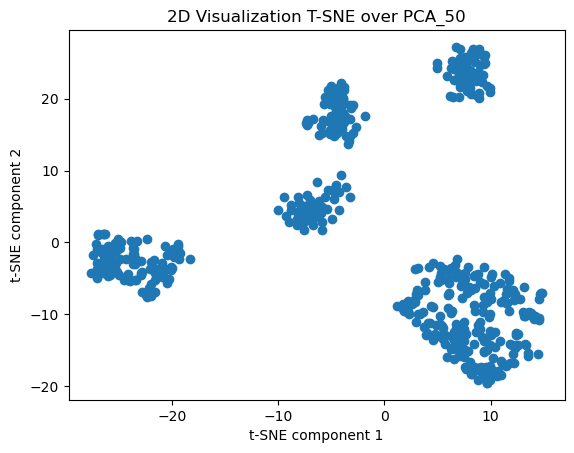

In [18]:
from sklearn.manifold import TSNE


X_pca50 = PCA(n_components=50).fit_transform(x_data_transform)

# 2. Aplicar T-SNE sobre los 50 PCs
X_tsne = TSNE(n_components=2, perplexity=40).fit_transform(X_pca50)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.title('2D Visualization T-SNE over PCA_50')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

Procesando con PCA n_components = 10...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Procesando con PCA n_components = 50...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Procesando con PCA n_components = 100...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Procesando con PCA n_components = 250...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Procesando con PCA n_components = 500...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


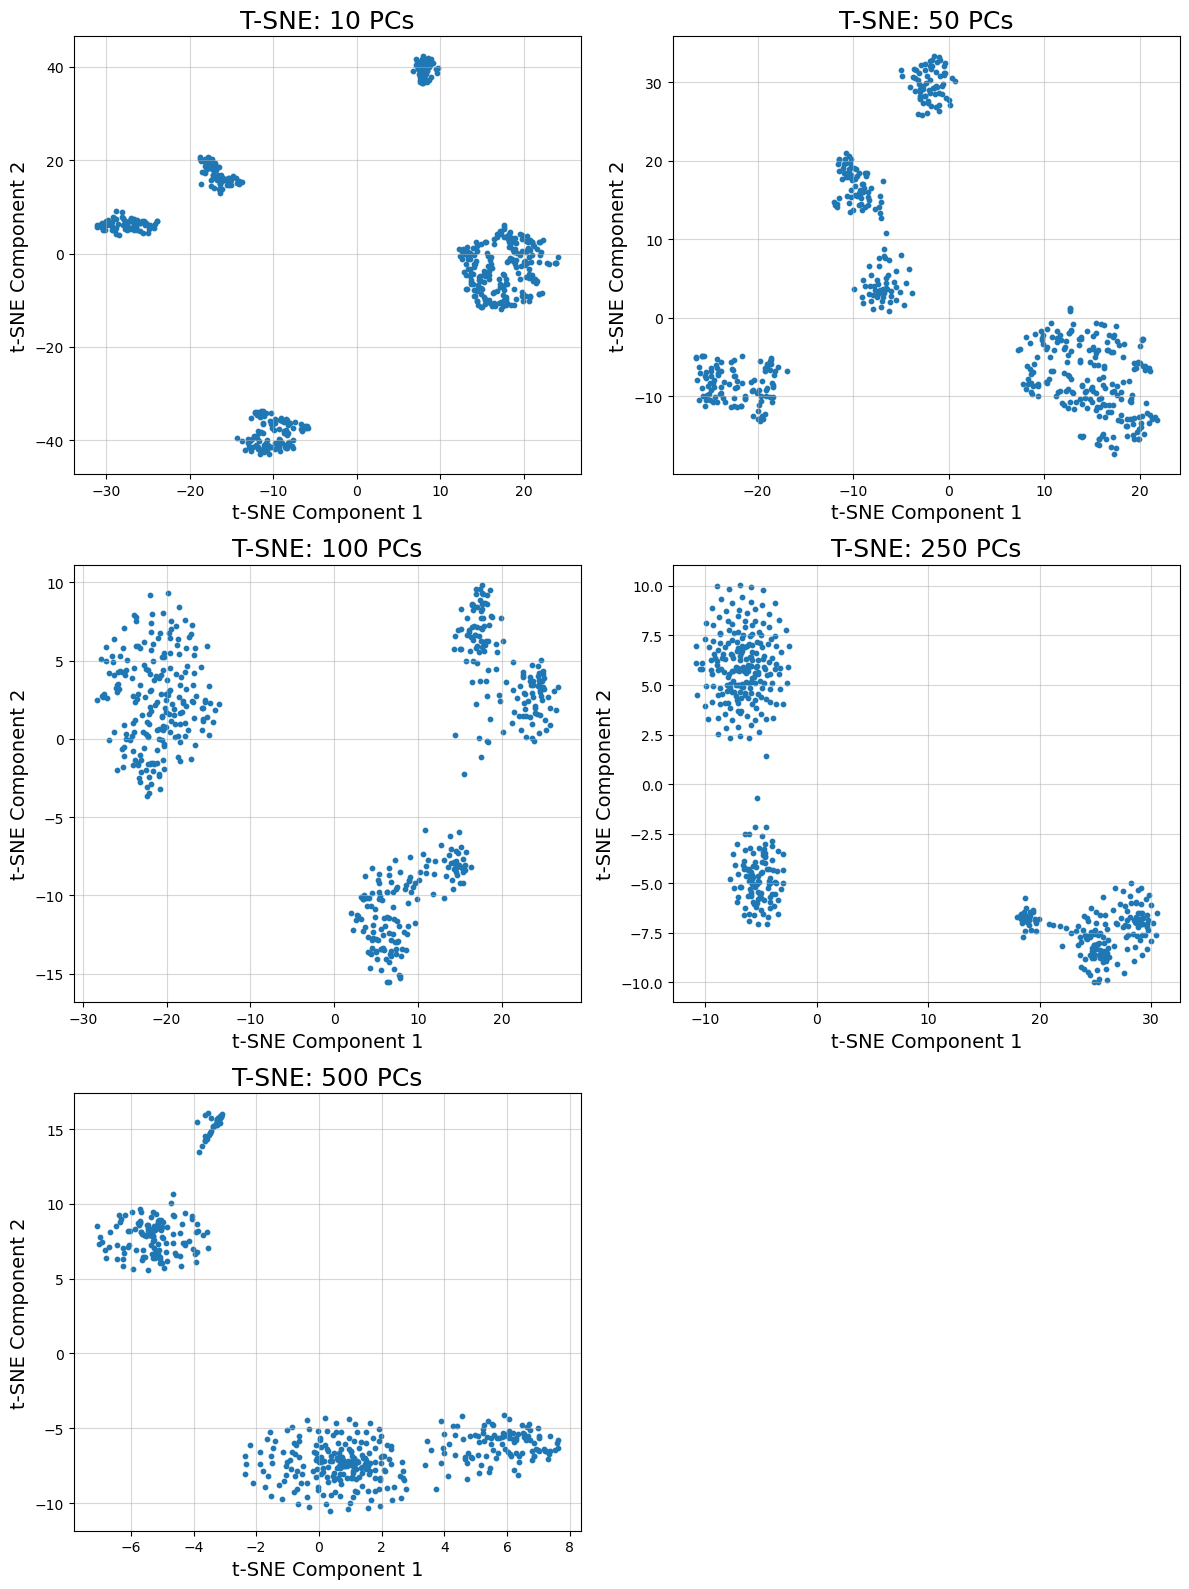


Proceso finalizado. Analiza los 5 gráficos generados.


In [26]:
plt.figure(figsize=(12, 16)) 
pc_list = [10, 50, 100, 250, 500]

for i, n_pcs in enumerate(pc_list):
    print(f"Procesando con PCA n_components = {n_pcs}...")

    # 1. Aplicar PCA (Reducción de dimensión a n_pcs)
    # Se entrena y aplica PCA a la data log-transformada
    pca = PCA(n_components=n_pcs, random_state=42)
    X_pca_reduced = pca.fit_transform(x_data_transform)

    # 2. Aplicar T-SNE sobre los n_pcs componentes
    # Se usa un subconjunto de datos o la aceleración si los datos son muy grandes.
    # Se usa n_iter=2000 y learning_rate='auto' para mayor estabilidad.
    tsne = TSNE(
        n_components=2, 
        perplexity=40, 
        n_iter=2000,
        learning_rate='auto', # Mejor manejo de la tasa de aprendizaje
        init='random',
        random_state=42, 
        n_jobs=4, # Usar todos los núcleos para acelerar el cálculo
    )
    X_tsne = tsne.fit_transform(X_pca_reduced)

    # 3. Graficar los resultados en un subplot
    plt.subplot(3, 2, i + 1) # Crea un arreglo de 2 filas y 3 columnas de gráficos
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10) # s=10 ajusta el tamaño del punto
    
    # 4. Configurar Títulos
    plt.title(f'T-SNE: {n_pcs} PCs', fontsize=18)
    plt.xlabel('t-SNE Component 1', fontsize = 14)
    plt.ylabel('t-SNE Component 2', fontsize = 14)
    plt.grid(True, alpha=0.5)

# Ajustar el diseño para evitar superposiciones de títulos
plt.tight_layout() 
plt.show()
print("\nProceso finalizado. Analiza los 5 gráficos generados.")

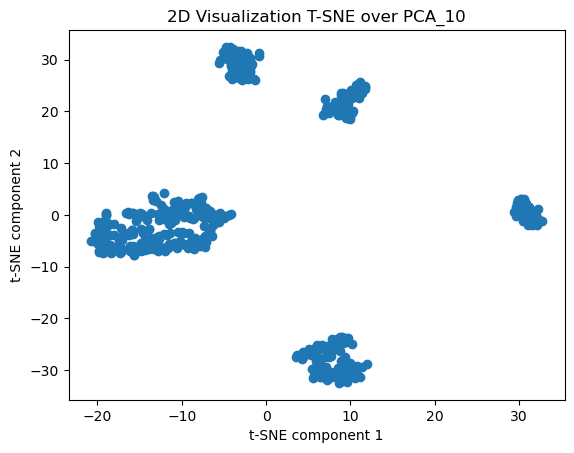

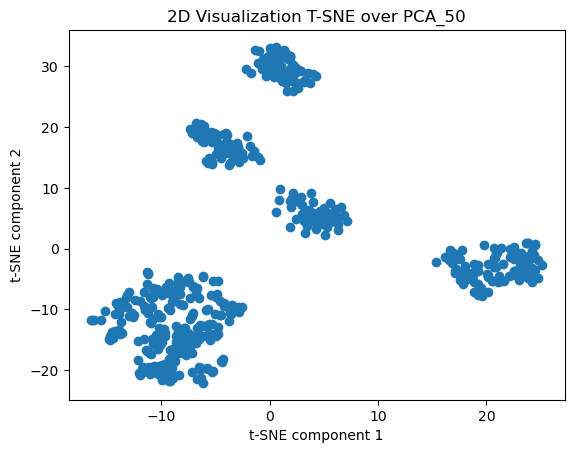

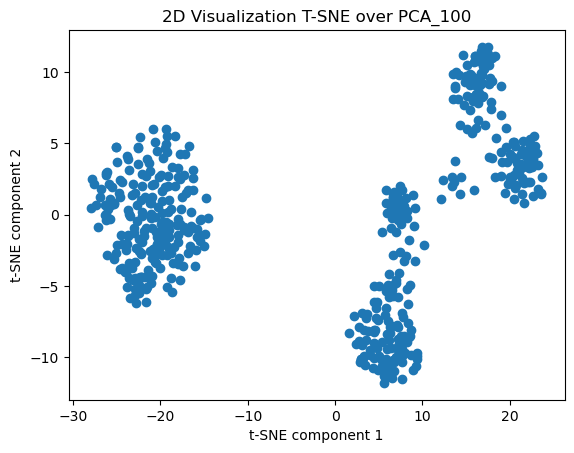

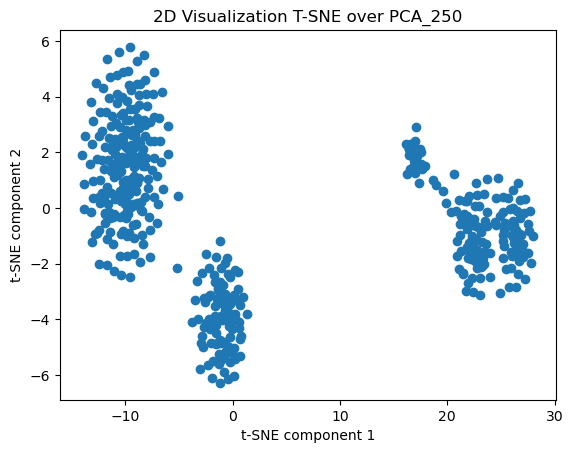

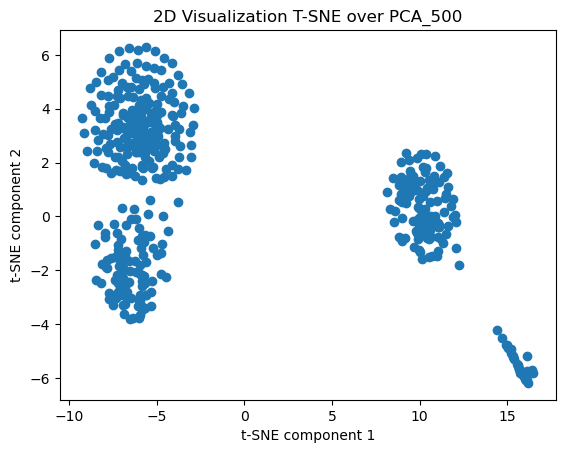

In [20]:
list_of_pcas = [10, 50, 100, 250, 500]
for components in list_of_pcas:

    X_pca_i = PCA(n_components = components).fit_transform(x_data_transform)
    # 2. Aplicar T-SNE sobre los 50 PCs
    X_tsne = TSNE(n_components = 2, perplexity=40).fit_transform(X_pca_i)

    plt.scatter(X_tsne[:,0], X_tsne[:,1])
    plt.title(f'2D Visualization T-SNE over PCA_{components}')
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')
    plt.show()

### Different Hyper - Parameters

T-SNE Perpexlity

Analizando T-SNE Perplexity...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


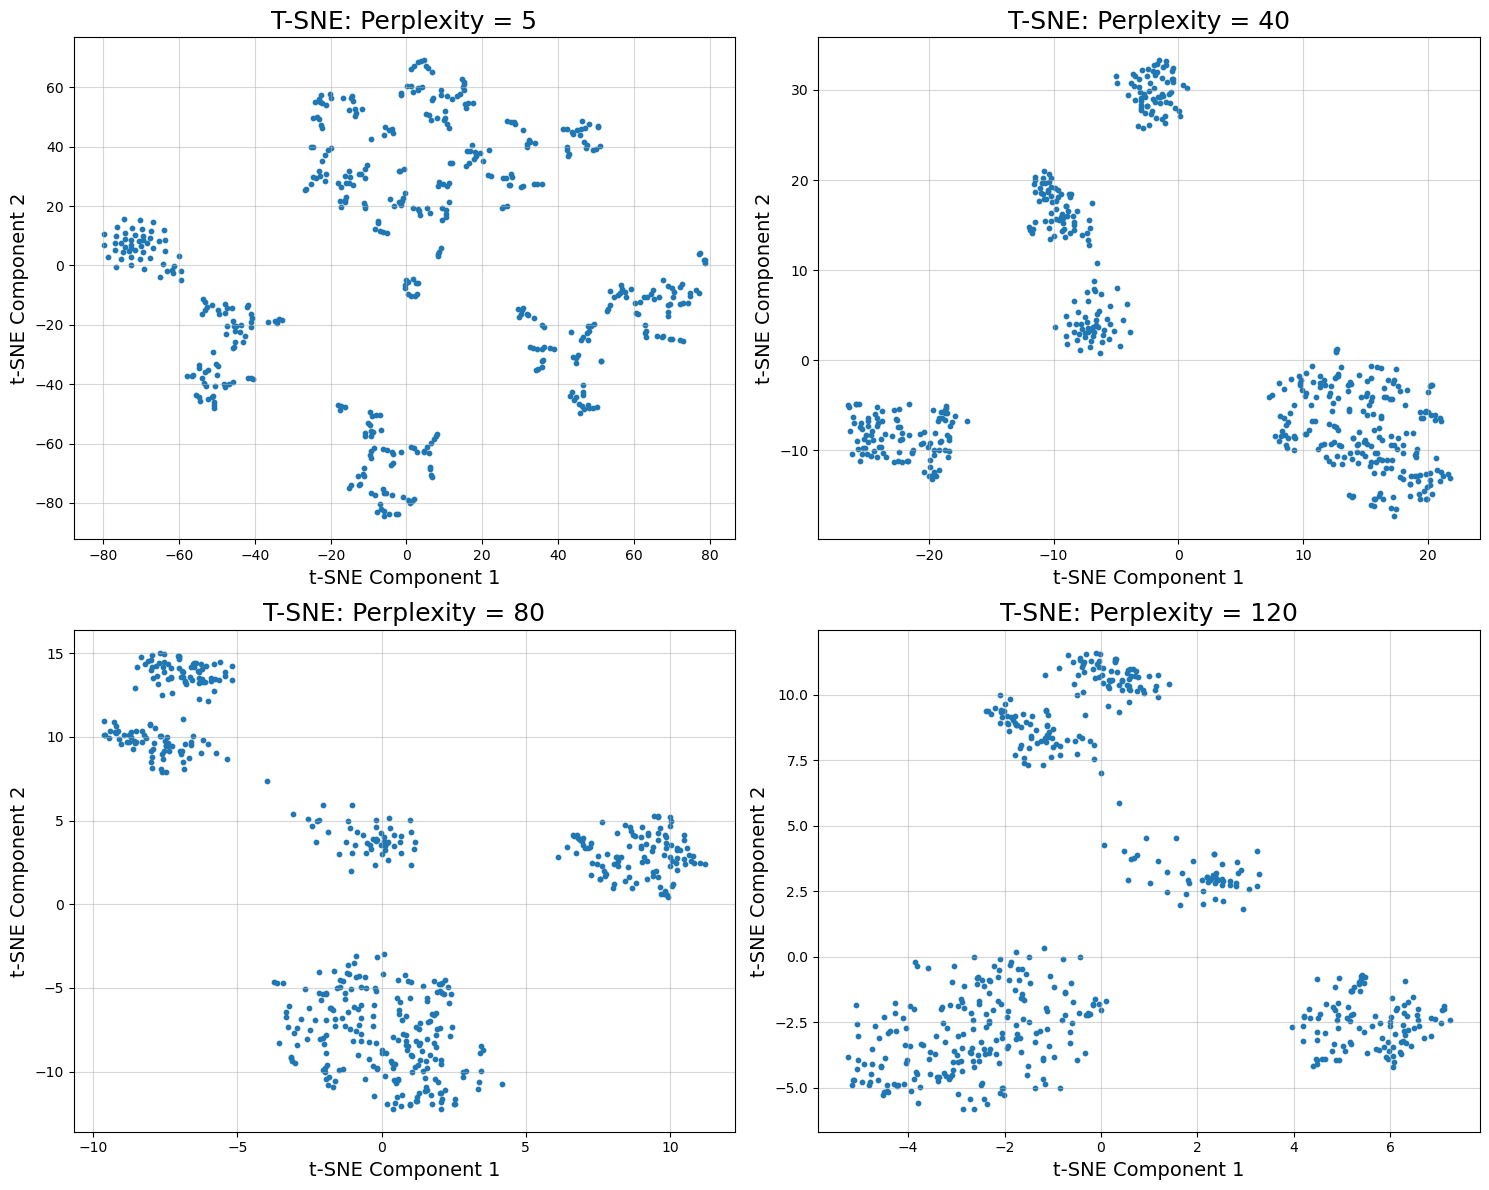

In [29]:
# Reutilizamos los datos con 50 PCs, que ya demostró ser un punto óptimo.
# Si el código de PCA no ha sido ejecutado, descomentar:

X_pca50 = PCA(n_components=50, random_state=42).fit_transform(x_data_transform)

perplexity_list = [5, 40, 80, 120]

plt.figure(figsize=(15, 12)) 
print("Analizando T-SNE Perplexity...")

for i, p in enumerate(perplexity_list):
    tsne_p = TSNE(
        n_components=2, 
        perplexity=p, 
        n_iter=2000,
        learning_rate='auto',
        init='random',
        random_state=42, 
        n_jobs=-1
    )
    X_tsne_p = tsne_p.fit_transform(X_pca50)

    plt.subplot(2, 2, i + 1)
    plt.scatter(X_tsne_p[:, 0], X_tsne_p[:, 1], s=10) 
    plt.title(f'T-SNE: Perplexity = {p}', fontsize=18) 
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)
    plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

Analizando T-SNE Early Exaggeration...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and w

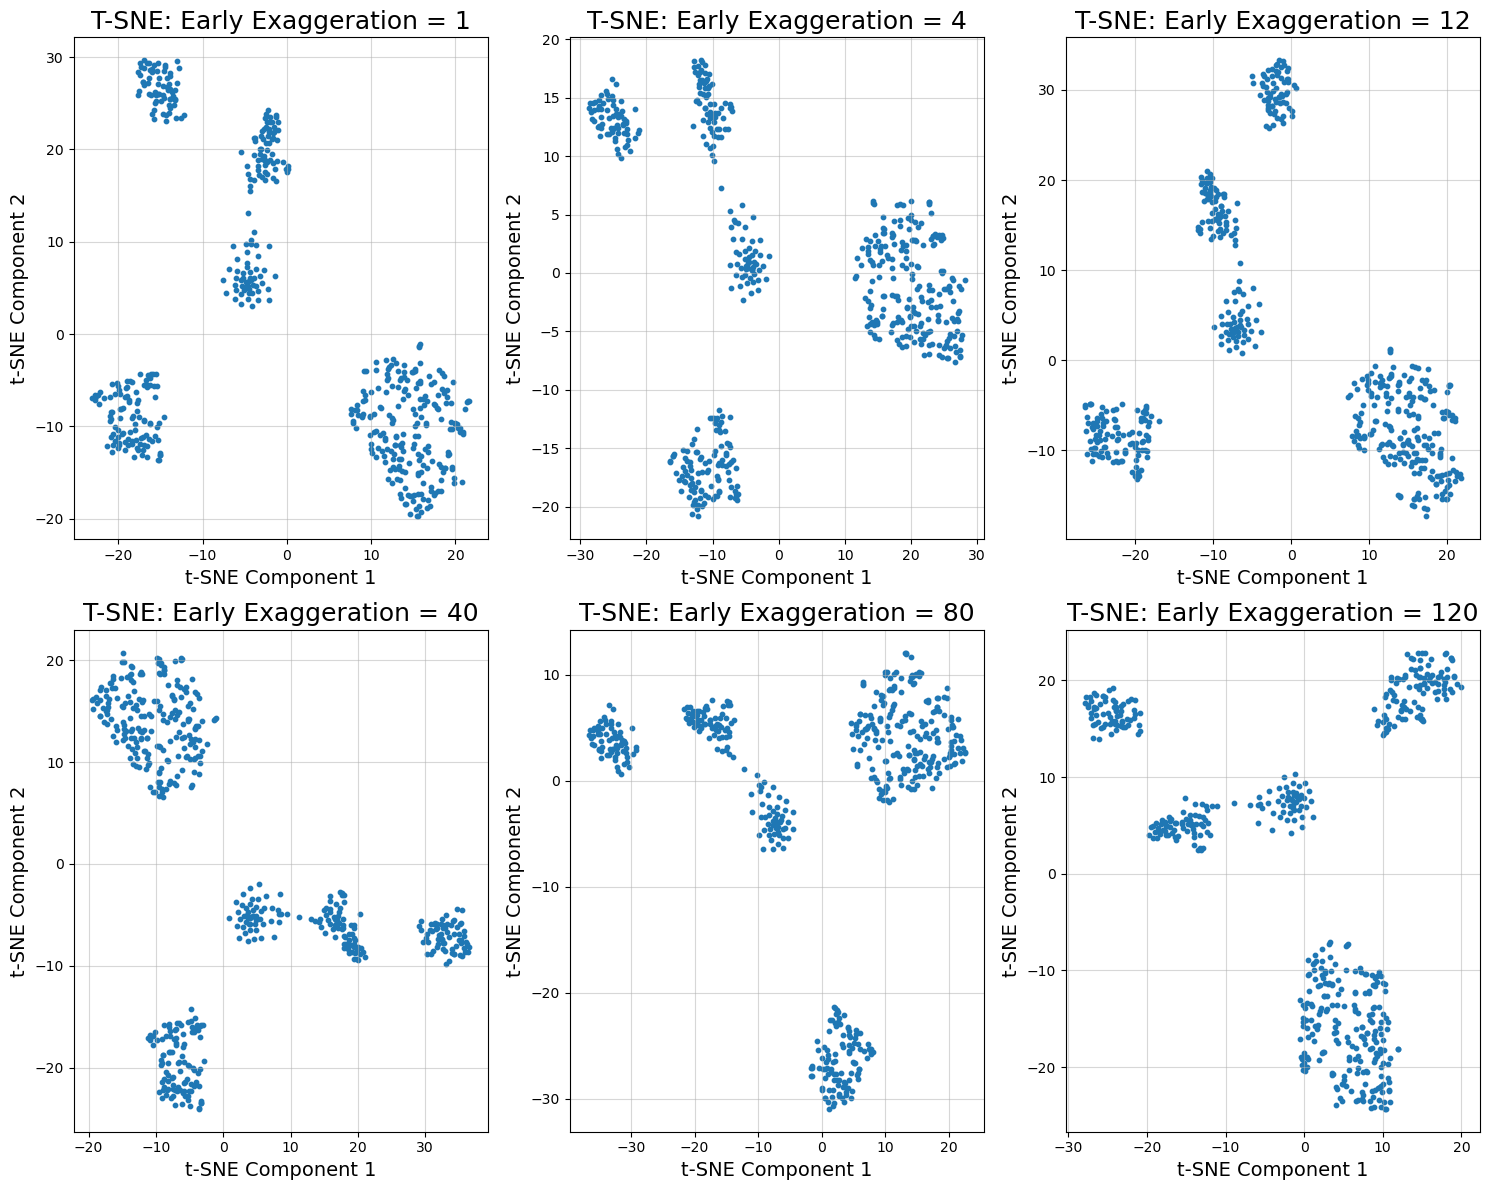

In [ ]:
# Mantenemos 50 PCs y Perplexity = 50 para controlar las variables
perplexity_fixed = 40
ee_list = [1, 4, 12, 40, 80, 120] 

plt.figure(figsize=(15, 12)) 
print("Analizando T-SNE Early Exaggeration...")

for i, ee in enumerate(ee_list):
    tsne_ee = TSNE(
        n_components=2, 
        perplexity=perplexity_fixed, 
        early_exaggeration=ee, # 👈 Hiperparámetro variable
        n_iter=2000,
        learning_rate='auto',
        init='random',
        random_state=42, 
        n_jobs=3
    )
    X_tsne_ee = tsne_ee.fit_transform(X_pca50)

    plt.subplot(3, 2, i + 1)
    plt.scatter(X_tsne_ee[:, 0], X_tsne_ee[:, 1], s=10) 
    
    # --- Ajustes de Fuente ---
    plt.title(f'T-SNE: Early Exaggeration = {ee}', fontsize=18)
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)
    # -------------------------
    
    plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

Analizando T-SNE Early Exaggeration...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and w

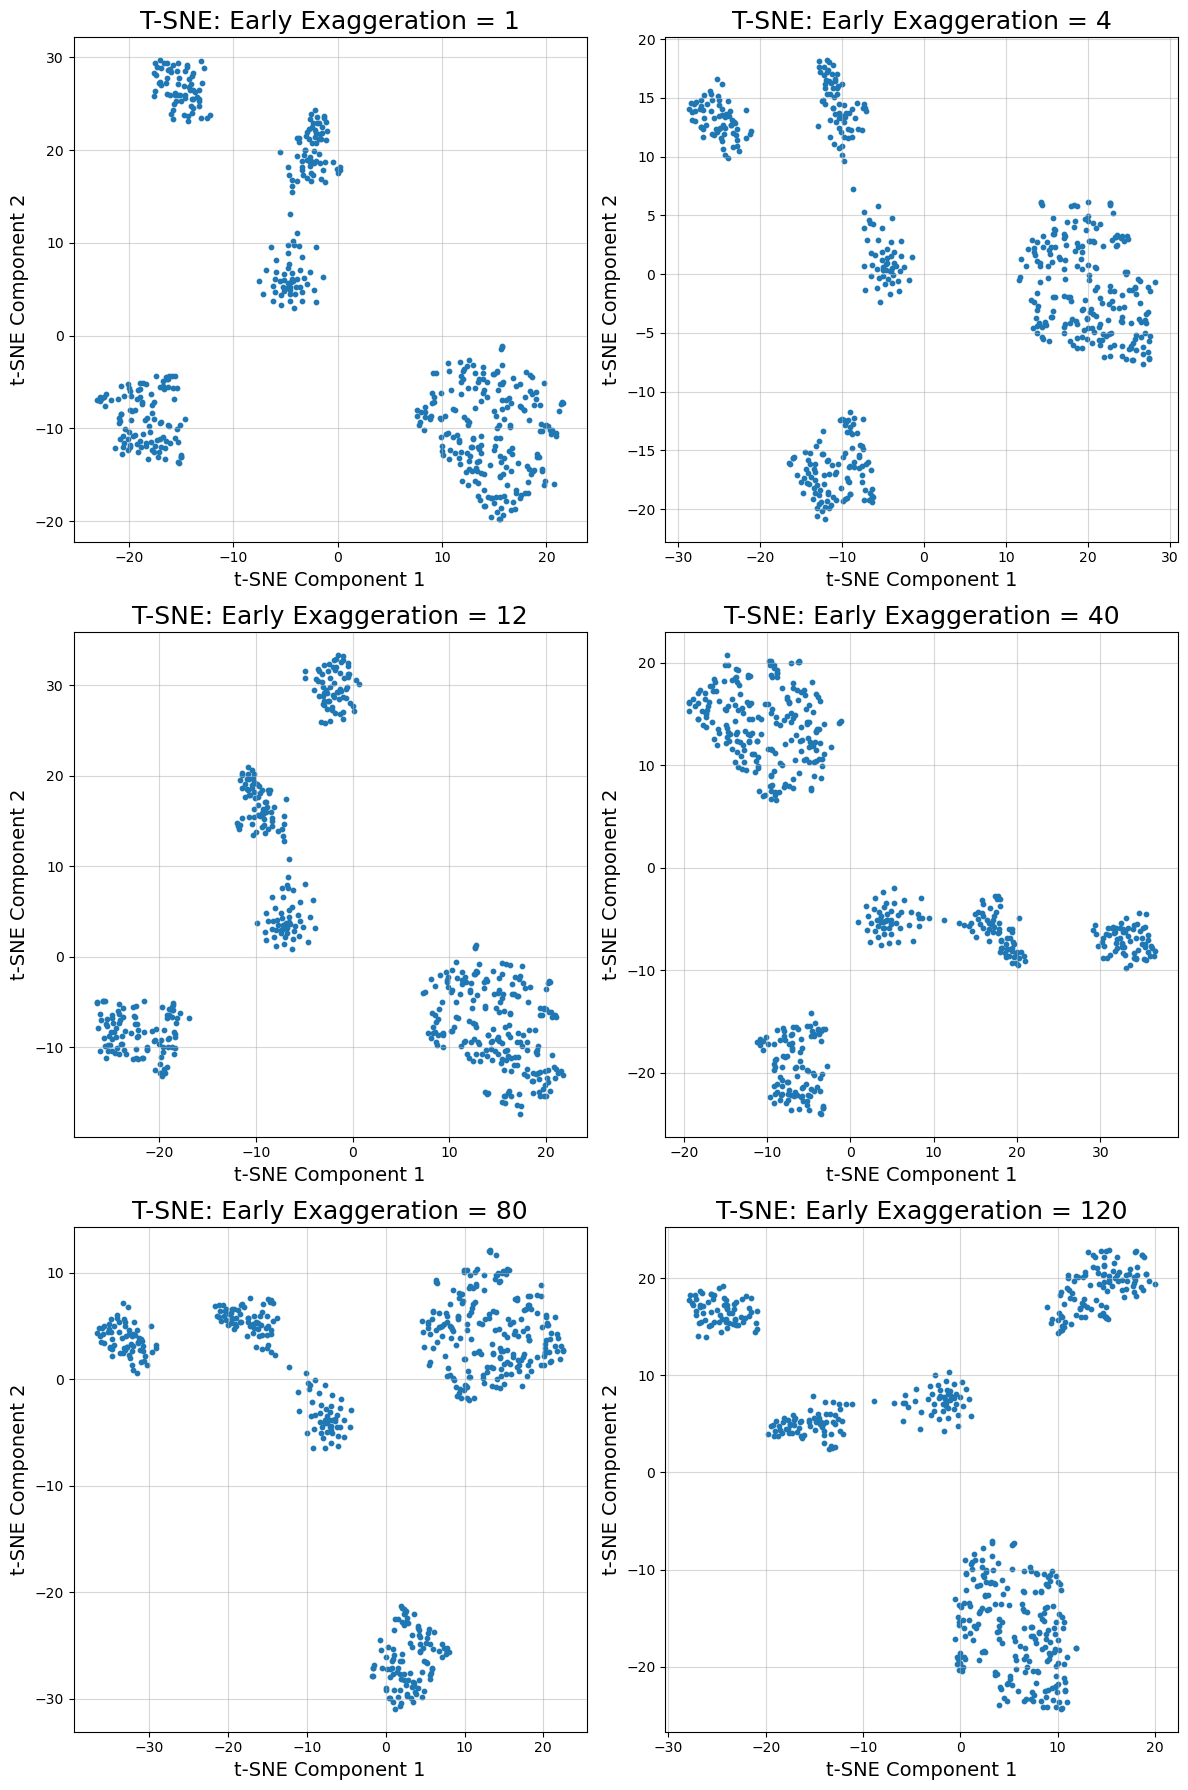

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA # Asumiendo que PCA se usa para X_pca50

# --- VARIABLES ASUMIDAS (Asegúrate de que X_pca50 esté definido) ---
# Si X_pca50 no está definido, aquí un ejemplo de cómo se haría:
# n_samples, n_features = 500, 1000
# x_data_transform = np.random.rand(n_samples, n_features) 
# X_pca50 = PCA(n_components=50, random_state=42).fit_transform(x_data_transform)
# ------------------------------------------------------------------

perplexity_fixed = 40
ee_list = [1, 4, 12, 40, 80, 120] 

plt.figure(figsize=(12, 18)) 
print("Analizando T-SNE Early Exaggeration...")

for i, ee in enumerate(ee_list):
    tsne_ee = TSNE(
        n_components=2, 
        perplexity=perplexity_fixed, 
        early_exaggeration=ee, # 👈 Hiperparámetro variable
        n_iter=2000,
        learning_rate='auto',
        init='random',
        random_state=42, 
        n_jobs=3
    )
    X_tsne_ee = tsne_ee.fit_transform(X_pca50)

    plt.subplot(3, 2, i + 1)
    plt.scatter(X_tsne_ee[:, 0], X_tsne_ee[:, 1], s=10) 
    

    plt.title(f'T-SNE: Early Exaggeration = {ee}', fontsize=18)
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)
    
    plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

### C) Number of PCs

In [38]:
import numpy as np

x_data = np.load('p1/X.npy')
y_data = np.load('p1/y.npy')
x_data.shape

def log_transform(data):
    arr_modificado = data.copy()
    arr_modificado = np.log2(arr_modificado + 1)
    return arr_modificado

x_data_transform = log_transform(x_data)

K = len(np.unique(y_data))

print(f'x_data_transform.shape is : {x_data_transform.shape}')
print(f'y_data.shape is : {y_data.shape}')
print(f'The number of clusters is: {K}')

x_data_transform.shape is : (511, 45768)
y_data.shape is : (511,)
The number of clusters is: 5


Analizando el impacto de los PCs en la Calidad del Clustering (K-Means K=5)...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memor


--- Resultados Numéricos ---
PCs=10: ARI (Calidad del Clustering) = 1.0000 | Precisión Logística = 1.0000
PCs=50: ARI (Calidad del Clustering) = 1.0000 | Precisión Logística = 1.0000
PCs=100: ARI (Calidad del Clustering) = 1.0000 | Precisión Logística = 1.0000
PCs=250: ARI (Calidad del Clustering) = 1.0000 | Precisión Logística = 1.0000
PCs=500: ARI (Calidad del Clustering) = 0.9973 | Precisión Logística = 1.0000


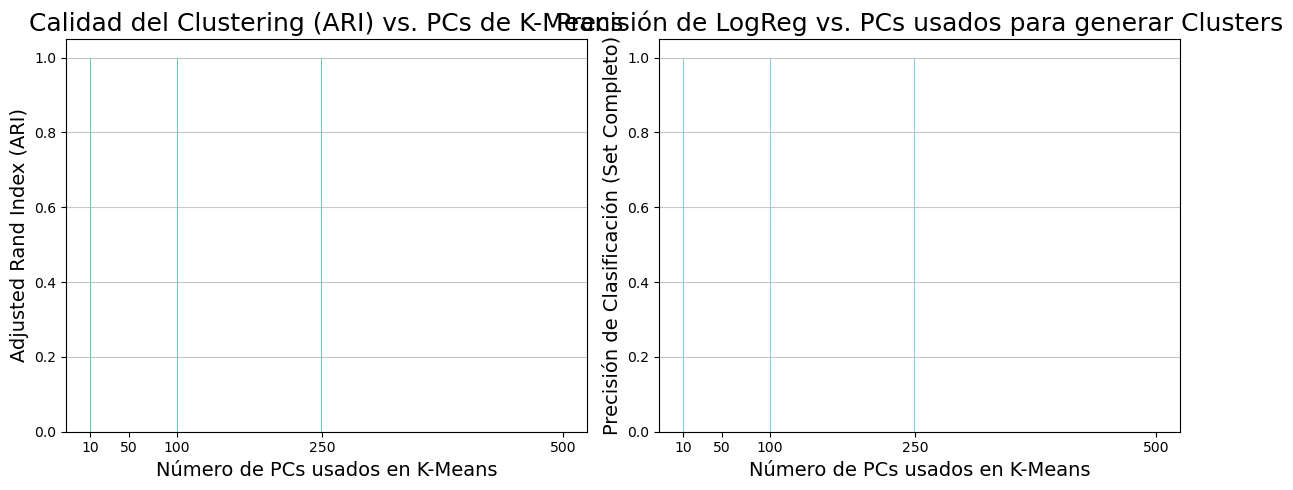

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score # Para medir la calidad del clustering
from sklearn.preprocessing import StandardScaler # Necesario para la Regresión Logística
from sklearn.linear_model import LogisticRegression

# --- VARIABLES ASUMIDAS (De tu código) ---
# x_data_transform: (511, 45768) - Datos log-transformados
# y_data: (511,) - Etiquetas de clase verdaderas (K=5)
K_FINAL = 5 # Usamos el número real de clases
# ----------------------------------------

# Escalamos la data original para la Regresión Logística (mismo procedimiento que el Problema 3)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_data_transform)

pc_list_clustering = [10, 50, 100, 250, 500]
accuracy_results = {}
ari_results = {}

print("Analizando el impacto de los PCs en la Calidad del Clustering (K-Means K=5)...")

for n_pcs in pc_list_clustering:
    # 1. PCA
    pca = PCA(n_components=n_pcs, random_state=42)
    X_pca = pca.fit_transform(x_data_transform)
    
    # 2. K-Means (Clustering)
    kmeans = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca) 
    
    # 3. Medir la Calidad del Clustering con ARI
    # Compara las etiquetas de K-Means (cluster_labels) contra las etiquetas verdaderas (y_data)
    ari = adjusted_rand_score(y_data, cluster_labels)
    ari_results[n_pcs] = ari
    
    # --- ANÁLISIS SECUNDARIO (PRECISIÓN) ---
    # Usamos la Regresión Logística para ver qué tan predecibles son los clusters generados
    # Nota: Aquí no hay división train/test para simplificar la comparación.
    # El ARI es la métrica principal para la calidad del clustering.
    logreg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr', random_state=42, n_jobs=-1)
    logreg.fit(X_scaled, cluster_labels) # Entrenar para predecir los clusters
    
    accuracy = logreg.score(X_scaled, cluster_labels) # Precisión en el set completo
    accuracy_results[n_pcs] = accuracy
    
print("\n--- Resultados Numéricos ---")
for pcs in pc_list_clustering:
    print(f"PCs={pcs}: ARI (Calidad del Clustering) = {ari_results[pcs]:.4f} | Precisión Logística = {accuracy_results[pcs]:.4f}")

# --------------------------------------------------------------------------
# VISUALIZACIÓN DE RESULTADOS
# --------------------------------------------------------------------------

plt.figure(figsize=(12, 5))

# Gráfico 1: Adjusted Rand Index (ARI)
plt.subplot(1, 2, 1)
plt.bar(ari_results.keys(), ari_results.values(), color='mediumaquamarine')
plt.title('Calidad del Clustering (ARI) vs. PCs de K-Means', fontsize=18)
plt.xlabel('Número de PCs usados en K-Means', fontsize=14)
plt.ylabel('Adjusted Rand Index (ARI)', fontsize=14)
plt.xticks(list(ari_results.keys()))
plt.grid(axis='y', alpha=0.7)

# Gráfico 2: Precisión de Clasificación Logística
plt.subplot(1, 2, 2)
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.title('Precisión de LogReg vs. PCs usados para generar Clusters', fontsize=18)
plt.xlabel('Número de PCs usados en K-Means', fontsize=14)
plt.ylabel('Precisión de Clasificación (Set Completo)', fontsize=14)
plt.xticks(list(accuracy_results.keys()))
plt.grid(axis='y', alpha=0.7)

plt.tight_layout()
plt.show()

### Probemos con cantidad de clusteres segun metodo del codo

Calculando inercia para el Método del Codo...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklea

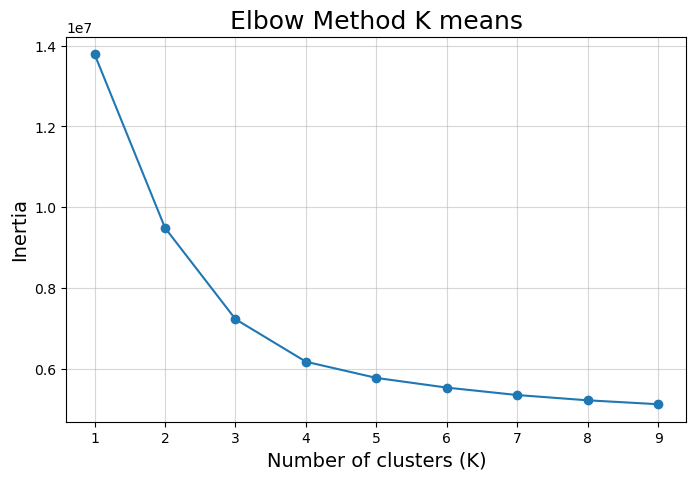

In [41]:
# Asumiendo que X_pca50 ya está definido (ej., usando 50 PCs)
# Si X_pca50 no está definido, se utiliza este código:

X_pca50 = PCA(n_components=50, random_state=42).fit_transform(x_data_transform)

from sklearn.cluster import KMeans

# Rango de K a probar
k_range = range(1, 10)
inertia = []

print("Calculando inercia para el Método del Codo...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca50)
    inertia.append(kmeans.inertia_)

# Gráfico del Codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method K means', fontsize=18)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(k_range)
plt.grid(True, alpha=0.5)
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Necesario si no está ya en el scope

# ----------------------------------------------------------------
# PREPARACIÓN DE DATOS
# Asumiendo que x_data_transform, X_pca50, y_data están en scope
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_data_transform)
# ----------------------------------------------------------------

K_list = [2, 3, 4, 5]
top_100_features = {} # Almacenará los índices de las 100 features para cada K

print("\n2. Extrayendo 100 características más importantes por valor de K...")

for K_val in K_list:
    print(f"  -> Procesando K={K_val}")

    # A. Generar Etiquetas de Cluster (K-Means)
    kmeans = KMeans(n_clusters=K_val, random_state=42, n_init=10)
    # K-Means corre sobre los datos reducidos por PCA (mejor estabilidad)
    cluster_labels = kmeans.fit_predict(X_pca50) 
    
    # B. Entrenamiento de Regresión Logística L1 (para selección de features)
    # Se usa C=10 para asegurar una fuerte regularización L1 y selección de features.
    logreg_cv = LogisticRegressionCV(
                Cs=[10.0],  # Prueba solo el valor C=10.0
                penalty='l1',
                solver='liblinear',
                multi_class='ovr',
                random_state=42,
                n_jobs=-1
    )
    # Entrenamos sobre los datos de ALTA DIMENSIÓN (X_scaled) para predecir las etiquetas
    logreg_cv.fit(X_scaled, cluster_labels)

    # C. Selección de las 100 Features (Coeficientes L1)
    # Obtenemos los coeficientes del modelo entrenado
    # El atributo .coef_ es una lista de arrays para multi_class='ovr'
    coefs = logreg_cv.coef_
    
    # Calculamos la magnitud absoluta promedio de los coeficientes para todas las clases
    feature_importance = np.mean(np.abs(coefs), axis=0)
    
    # Encontramos los índices de las 100 características más importantes
    top_100_indices = np.argsort(feature_importance)[::-1][:25]
    top_100_features[K_val] = top_100_indices

print(f"\nCaracterísticas extraídas para K={K_list}:")
for K_val, indices in top_100_features.items():
    # Pequeña verificación: ¿Cuántas features son únicas entre dos sets?
    if K_val > 2:
        overlap = len(np.intersect1d(top_100_features[K_val], top_100_features[K_val-1]))
        print(f"  K={K_val}: 100 features seleccionadas. Solapamiento con K={K_val-1} es {overlap}%")


2. Extrayendo 100 características más importantes por valor de K...
  -> Procesando K=2


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


  -> Procesando K=3


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


  -> Procesando K=4


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


  -> Procesando K=5


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1917: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegressionCV(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Características extraídas para K=[2, 3, 4, 5]:
  K=3: 100 features seleccionadas. Solapamiento con K=2 es 2%
  K=4: 100 features seleccionadas. Solapamiento con K=3 es 6%
  K=5: 100 features seleccionadas. Solapamiento con K=4 es 18%



3. Evaluando el poder predictivo de cada set de 100 features...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklea


--- Resultados de la Calidad de las Features (Precisión en Test Set) ---
K=2 (Features de K-Means): Precisión Predictiva = 0.9286
K=3 (Features de K-Means): Precisión Predictiva = 0.9610
K=4 (Features de K-Means): Precisión Predictiva = 0.9870
K=5 (Features de K-Means): Precisión Predictiva = 1.0000


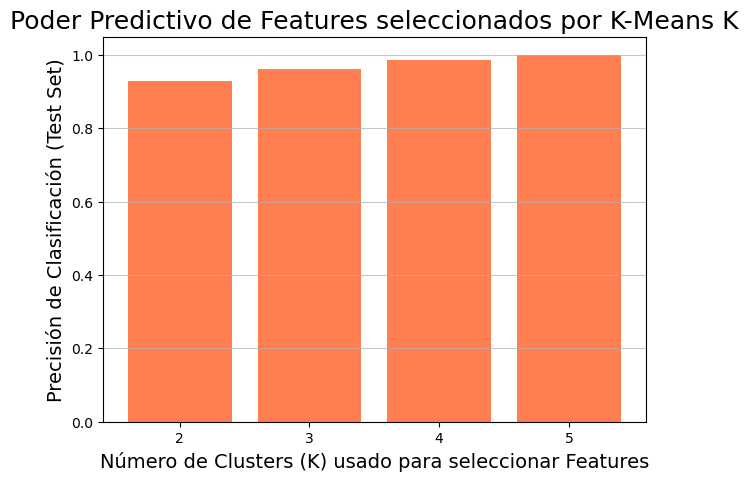

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

final_accuracy_results = {}

print("\n3. Evaluando el poder predictivo de cada set de 100 features...")

# Dividir la data original (X_scaled) y las etiquetas verdaderas (y_data)
# Esto es crucial para una métrica de rendimiento válida
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_scaled, y_data, test_size=0.3, random_state=42, stratify=y_data
)

for K_val, feature_indices in top_100_features.items():
    # A. Reducir la data a SOLO las 100 features seleccionadas
    X_train_reduced = X_train_full[:, feature_indices]
    X_test_reduced = X_test_full[:, feature_indices]
    
    # B. Entrenar un Clasificador (LogReg) con las etiquetas VERDADERAS
    logreg_final = LogisticRegression(
        penalty='l2',
        multi_class='multinomial', 
        solver='lbfgs',
        max_iter=500,
        random_state=42
    )
    logreg_final.fit(X_train_reduced, y_train)
    
    # C. Medir la Precisión en el conjunto de prueba
    y_pred = logreg_final.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, y_pred)
    final_accuracy_results[K_val] = accuracy
    
print("\n--- Resultados de la Calidad de las Features (Precisión en Test Set) ---")
for K_val, acc in final_accuracy_results.items():
    print(f"K={K_val} (Features de K-Means): Precisión Predictiva = {acc:.4f}")

# Visualización Final
plt.figure(figsize=(7, 5))
plt.bar(final_accuracy_results.keys(), final_accuracy_results.values(), color='coral')
plt.title('Poder Predictivo de Features seleccionados por K-Means K', fontsize=18)
plt.xlabel('Número de Clusters (K) usado para seleccionar Features', fontsize=14)
plt.ylabel('Precisión de Clasificación (Test Set)', fontsize=14)
plt.xticks(list(final_accuracy_results.keys()))
plt.grid(axis='y', alpha=0.7)
plt.show()

Generando visualizaciones de K-Means para K = [1, 2, 3, 4, 5]...


c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\user\anaconda3\envs\micromasters_ml_1\Lib\site-packages\sklea

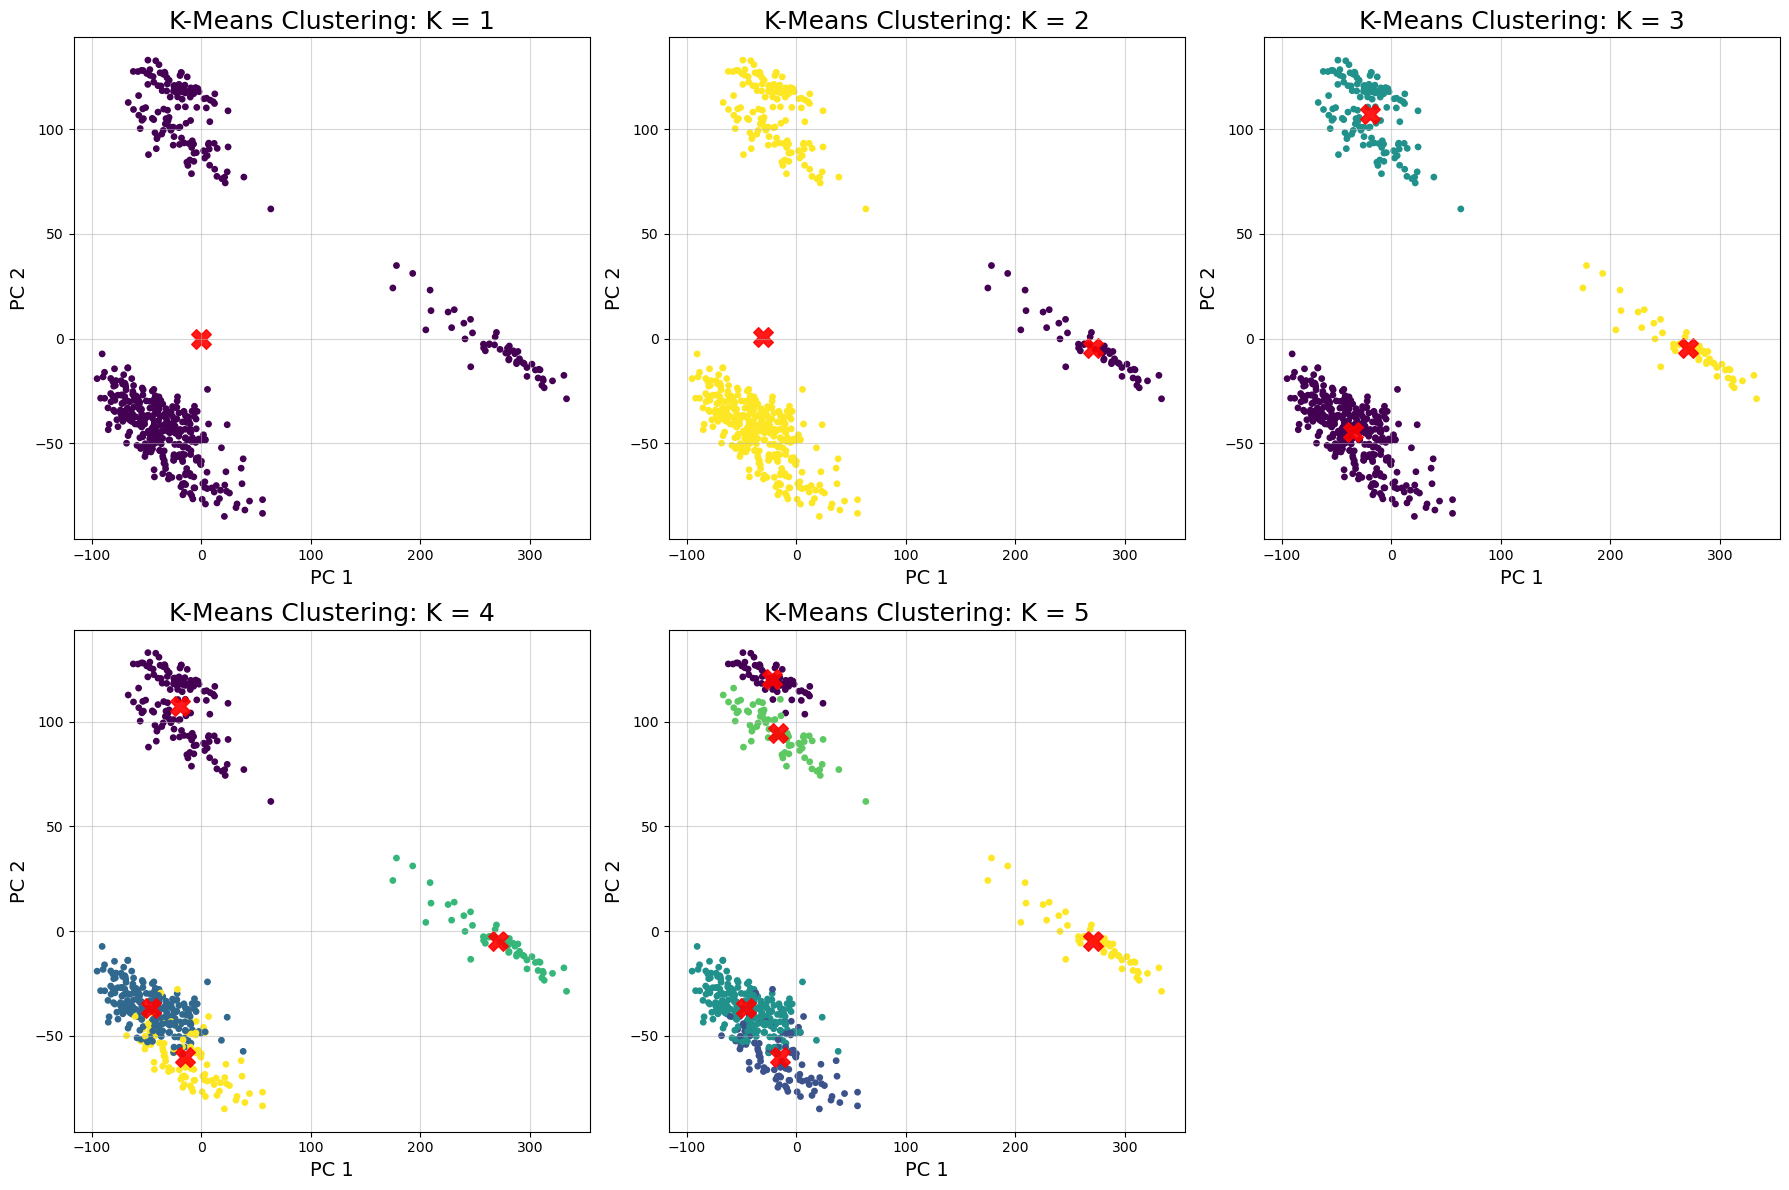

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Aseguramos que X_pca50 esté definido para la visualización
# X_pca50 = PCA(n_components=50, random_state=42).fit_transform(x_data_transform) 

K_visual_list = [1, 2, 3, 4, 5]

# Configuración de la figura: 2 filas y 3 columnas para que quepan todos los gráficos
plt.figure(figsize=(18, 12)) 
print("Generando visualizaciones de K-Means para K = [1, 2, 3, 4, 5]...")

for i, k in enumerate(K_visual_list):
    # 1. Aplicar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Ejecutamos sobre los 50 PCs
    cluster_labels = kmeans.fit_predict(X_pca50) 

    # 2. Configurar el subplot
    # Usamos una disposición 2 filas, 3 columnas
    plt.subplot(2, 3, i + 1)
    
    # 3. Graficar: Colorear los puntos según las etiquetas de cluster
    # Usamos el array X_pca50 para graficar las dos primeras componentes principales.
    # Nota: No usamos t-SNE aquí, es una visualización directa sobre el espacio de PCs.
    # Si quieres t-SNE, necesitaríamos recalcular X_tsne, pero esta es más sencilla y directa.
    plt.scatter(
        X_pca50[:, 0], # Primer PC
        X_pca50[:, 1], # Segundo PC
        c=cluster_labels, # Color según el cluster
        s=15, 
        cmap='viridis' # Esquema de color para distinguir los grupos
    )
    
    # Graficar los centroides (opcional, pero ayuda a entender K-Means)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Centroides')
    
    # 4. Configurar Títulos y Ejes
    plt.title(f'K-Means Clustering: K = {k}', fontsize=18)
    plt.xlabel('PC 1', fontsize=14)
    plt.ylabel('PC 2', fontsize=14)
    plt.grid(True, alpha=0.5)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout() 
plt.show()

In [ ]:
# Asumiendo que X_pca50 ya está definido y que el número de clusters óptimo es K=5
K_FIXED = 5

# 1. Generar etiquetas de K-Means una sola vez (sobre 50 PCs)
kmeans_k5 = KMeans(n_clusters=K_FIXED, random_state=42, n_init=10)
cluster_labels_k5 = kmeans_k5.fit_predict(X_pca50) 
print(f"Etiquetas de K-Means fijadas en K={K_FIXED}")

# 2. Lista de perplexities a probar
perplexity_list = [5, 30, 50, 100]

plt.figure(figsize=(15, 12)) 
print("Analizando cómo Perplexity visualiza el clustering fijo de K-Means...")

for i, p in enumerate(perplexity_list):
    # Aplicar T-SNE
    tsne_p = TSNE(
        n_components=2, 
        perplexity=p, 
        n_iter=2000,
        learning_rate='auto',
        init='random',
        random_state=42, 
        n_jobs=-1
    )
    X_tsne_p = tsne_p.fit_transform(X_pca50)

    # 3. Graficar: Usar las etiquetas de cluster como color
    plt.subplot(2, 2, i + 1)
    plt.scatter(
        X_tsne_p[:, 0], 
        X_tsne_p[:, 1], 
        c=cluster_labels_k5, # 👈 Usamos las etiquetas fijas de K-Means
        s=10, 
        cmap='Spectral' # Un buen mapa de color para clusters
    ) 
    
    # --- Ajustes de Fuente ---
    plt.title(f'K-Means (K={K_FIXED}) visualizado por T-SNE: Perplexity = {p}', fontsize=18) 
    plt.xlabel('t-SNE Component 1', fontsize=14)
    plt.ylabel('t-SNE Component 2', fontsize=14)
    # -------------------------
    
    plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()